In [2]:
from influxdb import InfluxDBClient
#client = InfluxDBClient('influxdb-01.perf.ptec', 8086, 'admin', 'admin', 'test_db')
#result = client.query('select * from logins where time > now() - 1h limit 1000;')


In [2]:
import pandas as pd

In [3]:
#df= pd.DataFrame(result.get_points())
df=pd.read_pickle('month_serie.pickle')

In [5]:
from influxdb import DataFrameClient

In [7]:
client = InfluxDBClient('localhost', 8086, 'admin', 'admin', 'test_db')

In [9]:
import pickle
result = pickle.load( open( "test.pkl", "rb" ) )

In [17]:
import time

start = time.time()

#protocol = 'json'
#client.write_points(result.get_points(), database = 'test_db', protocol=protocol, time_precision = 'm')

end = time.time()
print(end - start)

4.100799560546875e-05


In [16]:
#df

In [15]:
#df_coral = df[df['site'] == 'coral-prod']
#df_coral

In [14]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)
#df_coral.plot()

Populating the interactive namespace from numpy and matplotlib


/Users/aleksandr/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['std', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [13]:
#time_serie_login=df['count'].groupby(df['time']).sum()
#time_serie_login

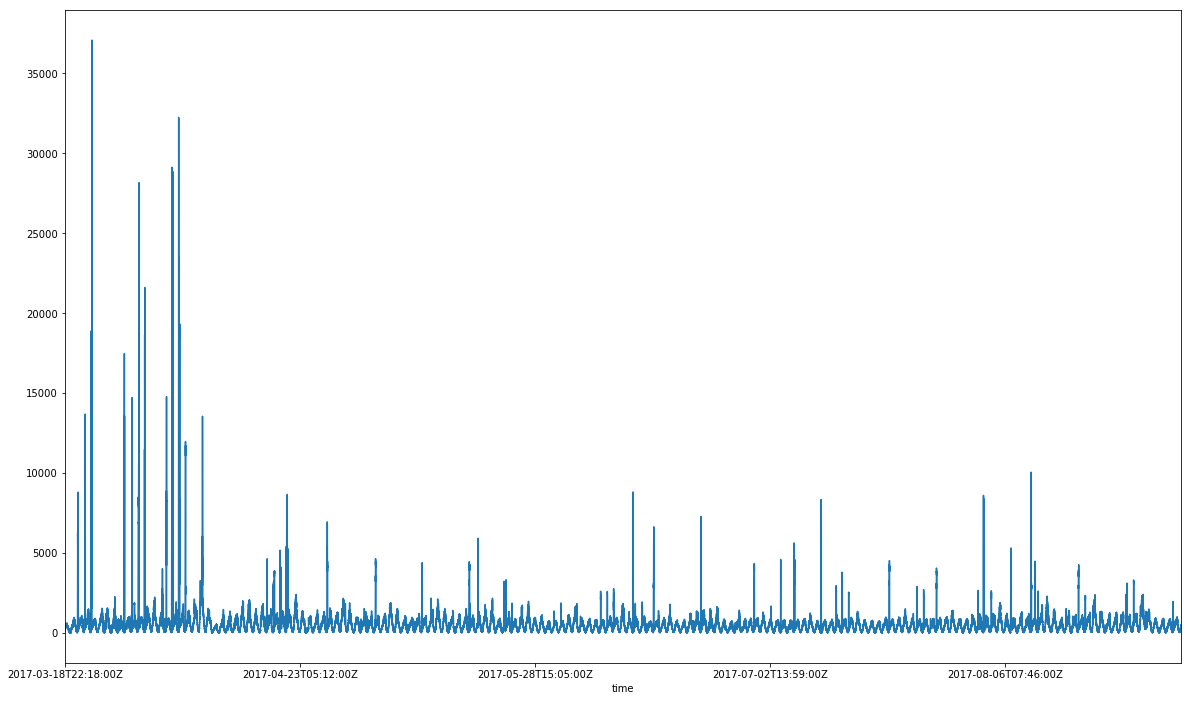

In [356]:
time_serie_login.plot()

In [12]:
#result = client.query('select * from logins where time > 1501545600000000;')

In [11]:
#df= pd.DataFrame(result.get_points())

In [10]:
#df.to_pickle('/data/month_serie.pickle')

In [35]:
df.to_csv('/data/month_serie.csv')

In [5]:
df = pd.read_pickle('month_serie.pickle')

In [6]:
df_coral = df[df['site'] == 'coral-prod']

In [8]:
#df_coral

In [9]:
#time_serie_login=df['count'].groupby(df['time']).sum()
#time_serie_login

In [6]:
time_serie_login.size

237509

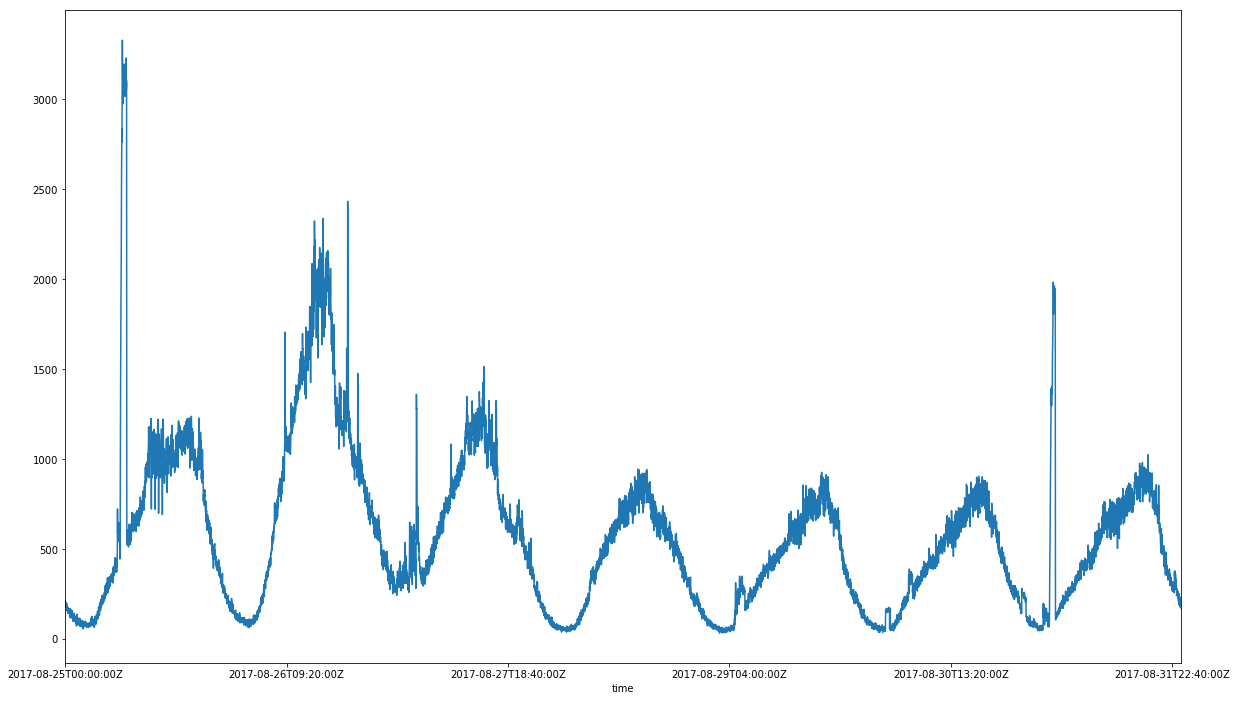

In [92]:
aug_ts = time_serie_login['2017-08-25T00:00:00Z':'2017-09-01T00:00:00Z']
aug_ts.plot()

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)

Populating the interactive namespace from numpy and matplotlib


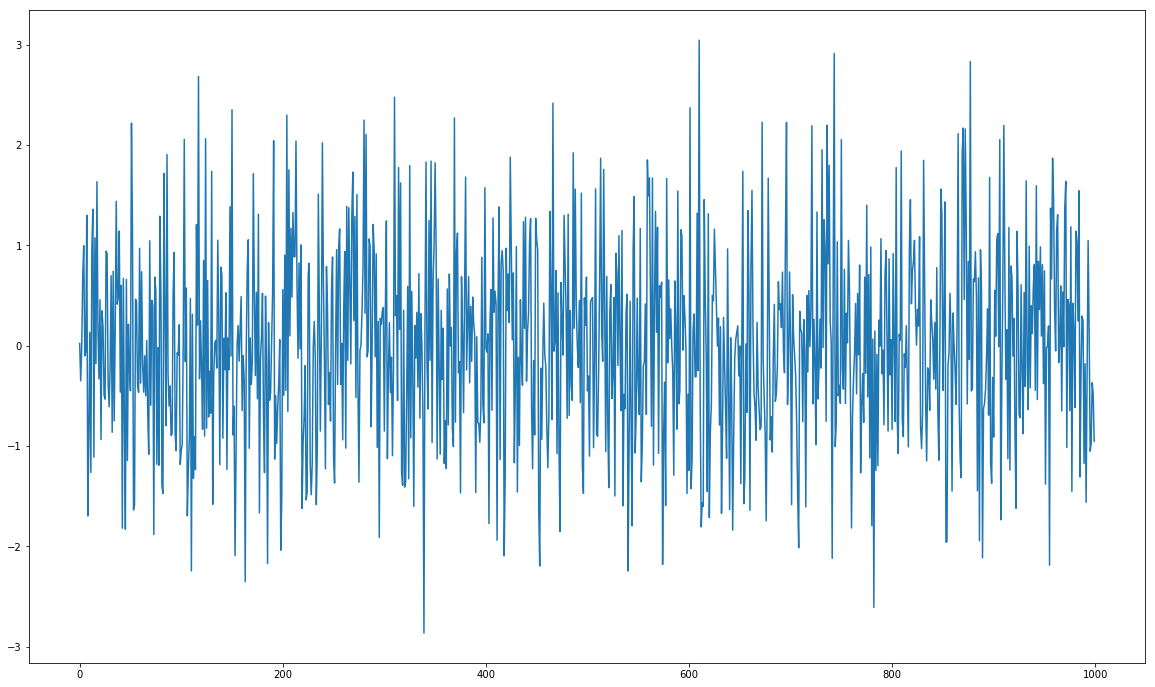

In [7]:
mean = 0
std = 1 
num_samples = 1000
samples = numpy.random.normal(mean, std, size=num_samples)

plt.plot(samples)
plt.show()


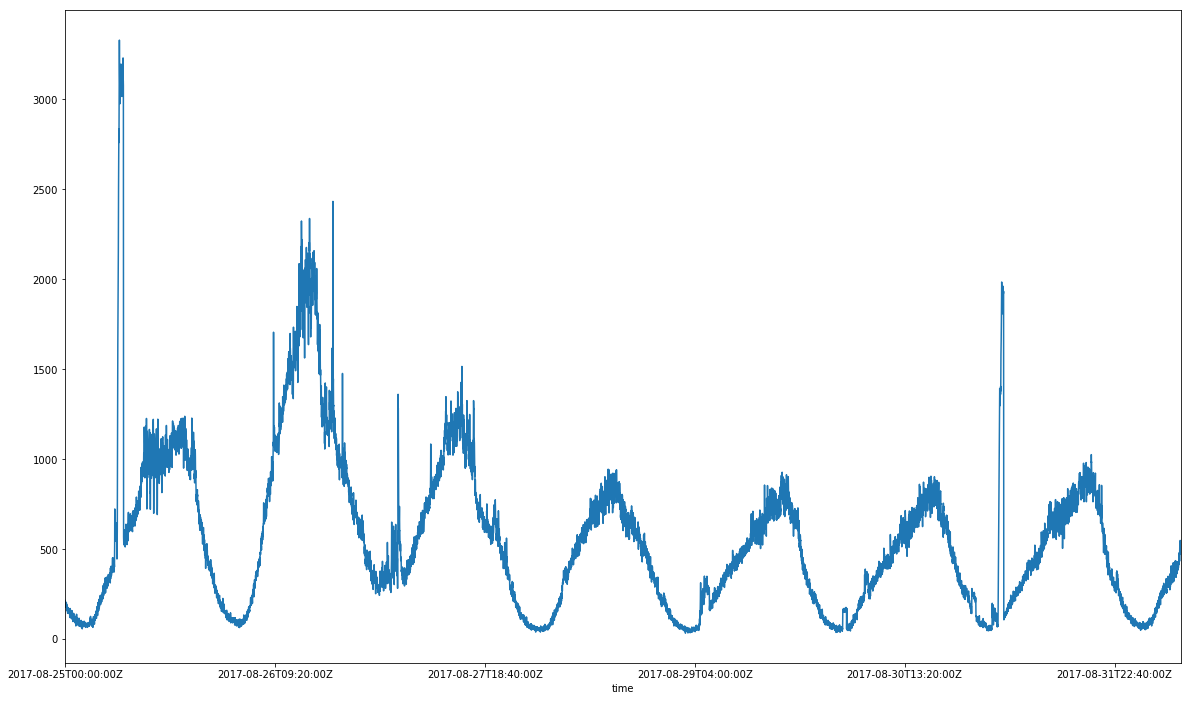

In [10]:
aug_ts.plot()

In [13]:
model = time_serie_login['2017-08-18T00:00:00Z':'2017-08-25T00:00:00Z']
test = time_serie_login['2017-08-25T00:00:00Z':'2017-09-01T00:00:00Z']
half_hour = time_serie_login['2017-08-27T12:00:00Z':'2017-08-27T12:30:00Z']

In [14]:
model.size, test.size, half_hour.size

(10080, 10081, 31)

In [15]:
half_hour.describe()

count      31.000000
mean     1104.516129
std       109.689219
min       941.000000
25%      1013.500000
50%      1106.000000
75%      1178.500000
max      1348.000000
Name: count, dtype: float64

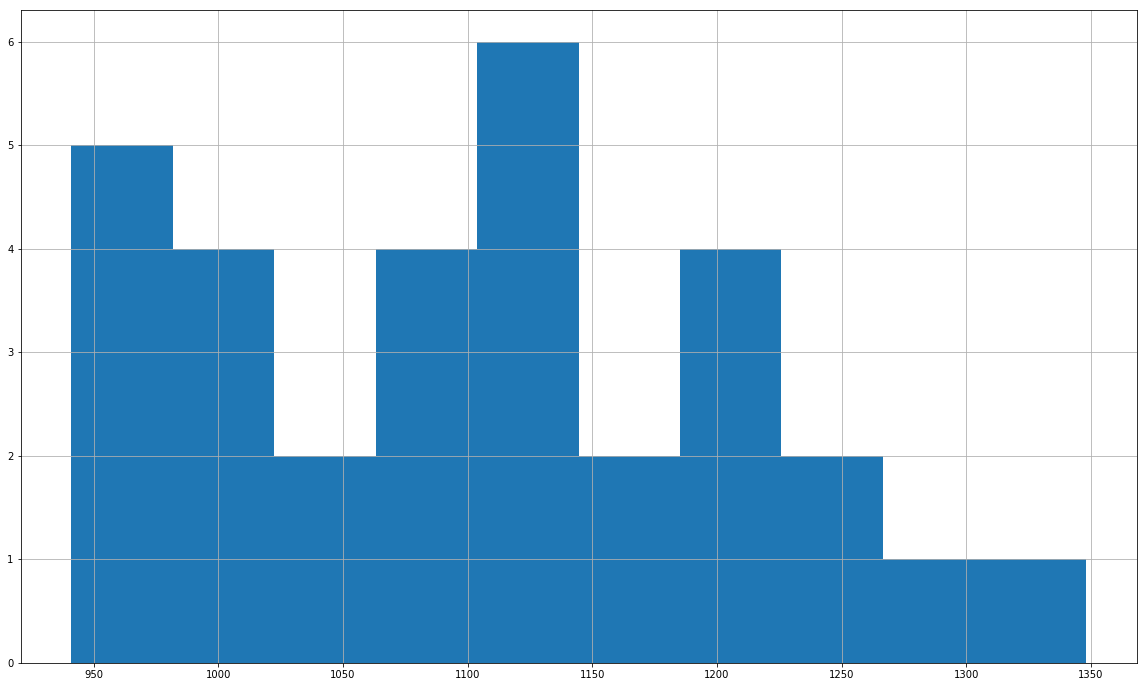

In [16]:
half_hour.hist()

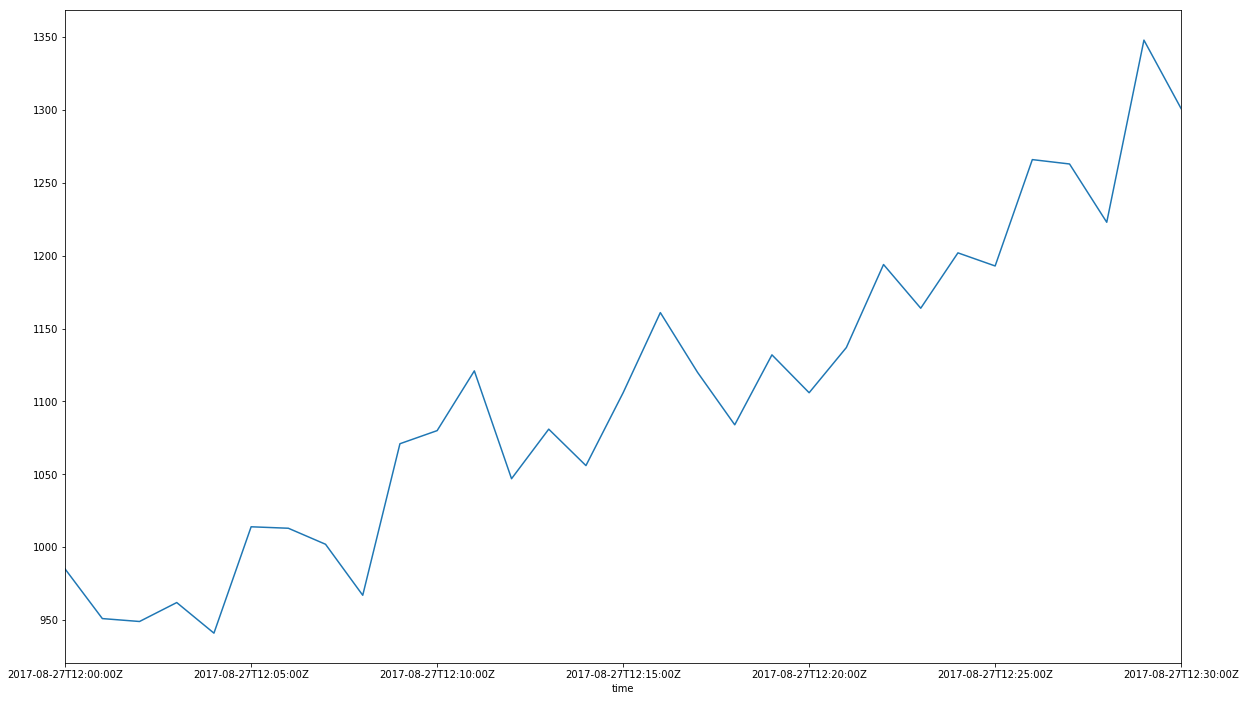

In [17]:
half_hour.plot()

In [18]:

import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt

In [19]:
def fit_line2(x, y):
    X = sm.add_constant(x, prepend=True) #Add a column of ones to allow the calculation of the intercept
    ols_test = sm.OLS(y, X,missing='drop').fit()
    """Return slope, intercept of best fit line."""
    X = sm.add_constant(x)
    return ols_test

In [18]:
#df_ols = half_hour.to_frame()
#df_ols.insert(0, 'x', range(1, 1 + len(df_ols)))

#df_ols

In [21]:

ols_test=fit_line2(df_ols['x'][1:-1], df_ols['count'][1:-1]) 
ols_test.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     212.4
Date:                Tue, 19 Sep 2017   Prob (F-statistic):           2.58e-14
Time:                        13:07:37   Log-Likelihood:                -143.92
No. Observations:                  29   AIC:                             291.8
Df Residuals:                      27   BIC:                             294.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        916.2700     14.371     63.757      0.000     886.783     945.757
x             11.5995      0.796     14.573      0.000       9.966      13.233
==============================================================================
Omnibus:                        1.159   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.560   Jarque-Bera (JB):                1.026
Skew:                           0.426   Prob(JB):                        0.599
Kurtosis:                       2.648   Cond. No.                         39.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

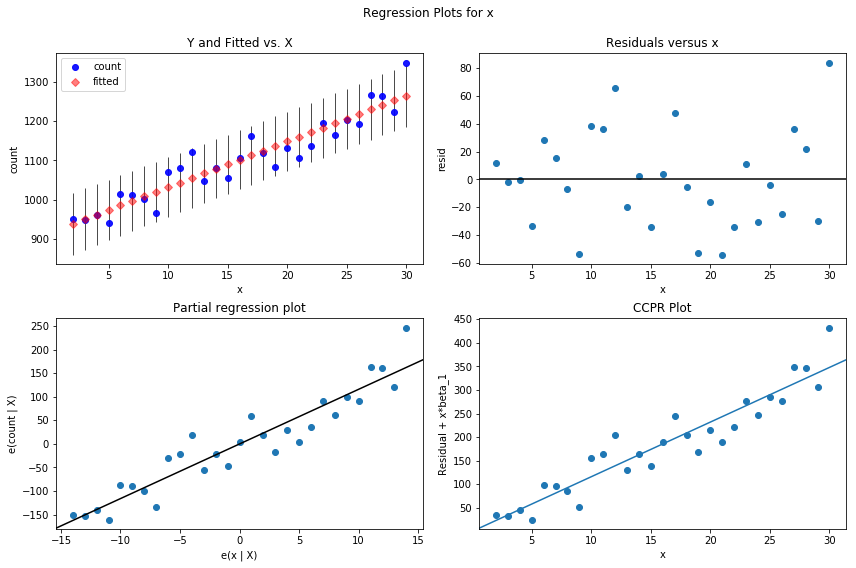

In [22]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(ols_test,'x',fig=fig)

In [23]:
level, slope = ols_test.params

In [24]:
slope

11.599507389162566

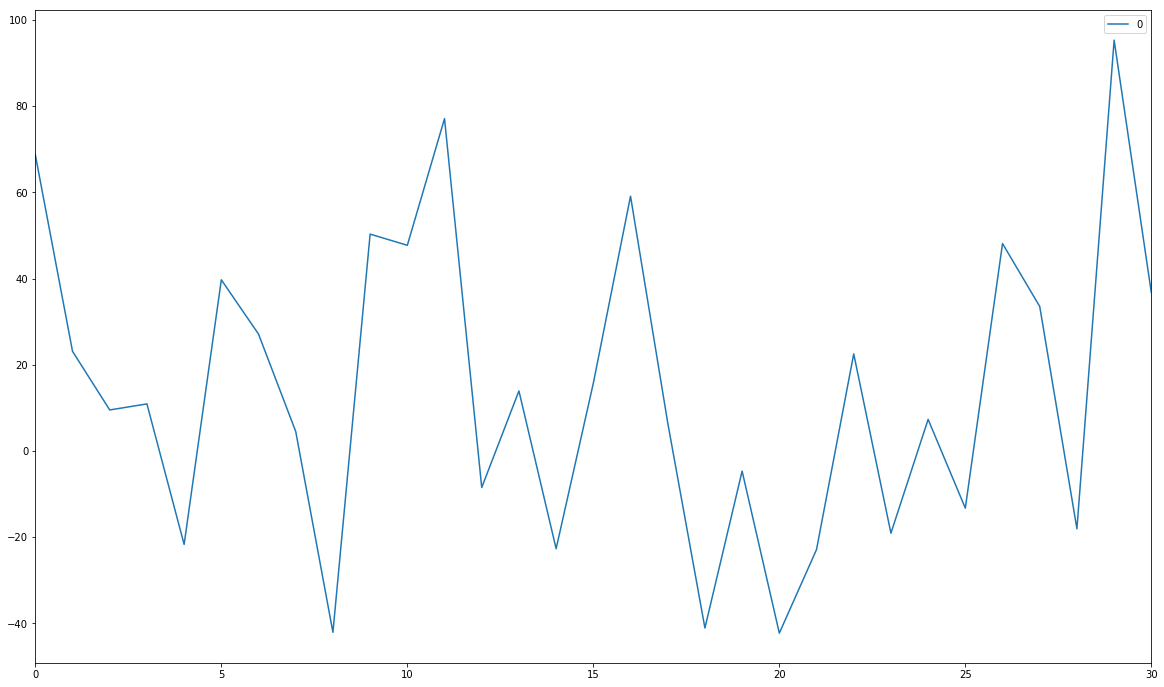

In [25]:
rows_list = []
step = 0 
for index, row in df_ols.iterrows():
    rows_list.append(row['count'] - (level + slope * step))
    step = step + 1
df_norm = pd.DataFrame(rows_list)
df_norm.plot()

In [26]:
df_norm.describe()

,0
count,31.000000
mean,14.253567
std,35.777865
min,-42.260099
25%,-15.656897
50%,10.931527
75%,38.238670
max,95.344335


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x190acfa20>]], dtype=object)

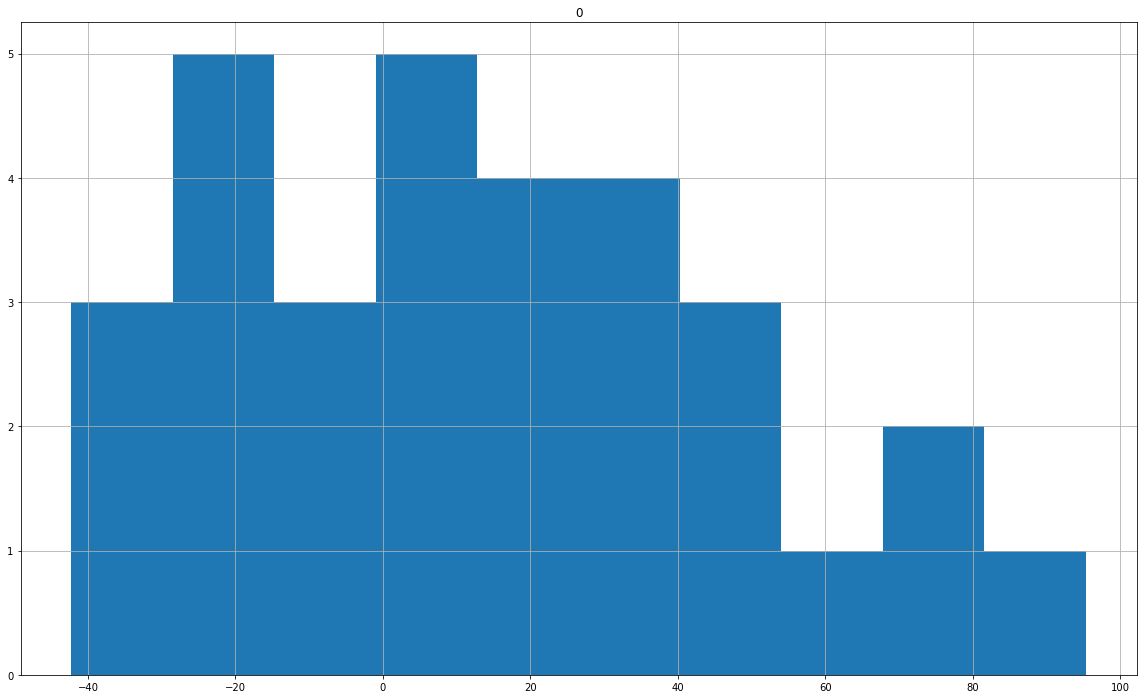

In [27]:
df_norm.hist()

In [28]:
norm_as_series = df_norm.T.squeeze()
source_as_series = half_hour.T.squeeze()

Dickey–Fuller test: p=0.989423


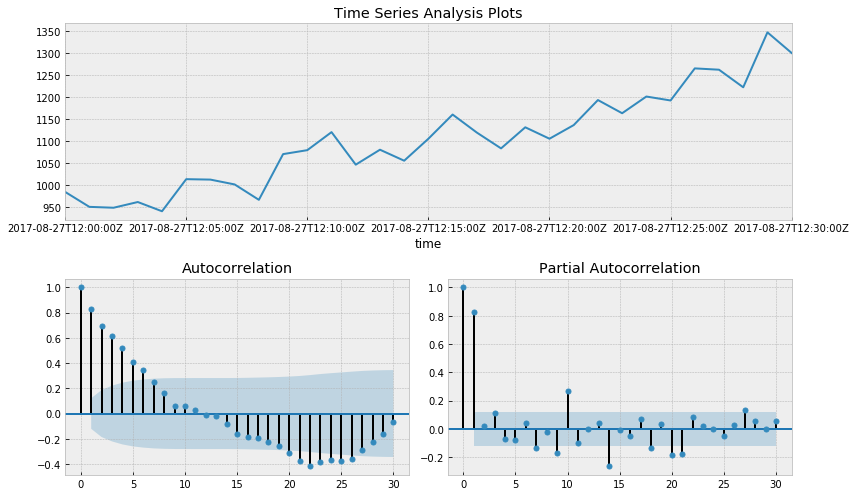

In [29]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return 

tsplot(source_as_series)
#tsplot(norm_as_series)


Dickey–Fuller test: p=0.000014


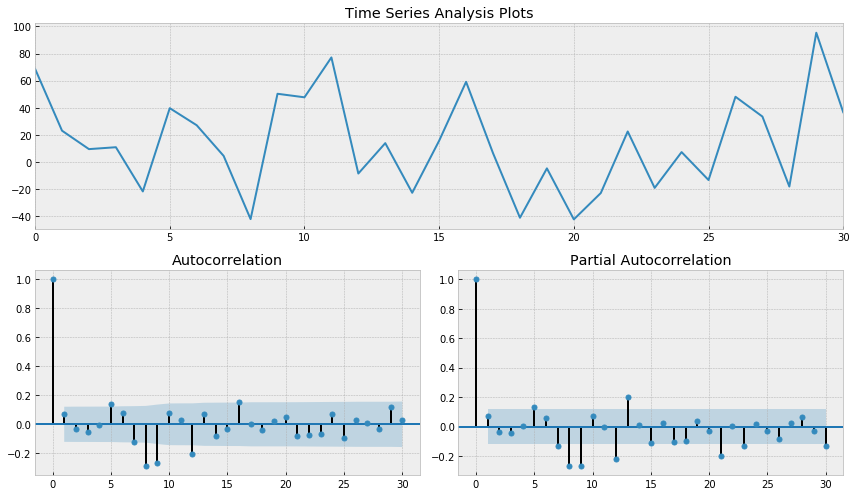

In [30]:
tsplot(norm_as_series)

In [31]:
hours_slice = {}
model_sr = {}
for i in range(0,8):
    parameters_dict = {}
    
    temp_df = time_serie_login['2017-08-26T0' + str(i) + ':00:0Z':'2017-08-26T0' + str(i + 1) + ':00:0Z']
    result_df = temp_df.to_frame()
    result_df.insert(0, 'x', range(1, 1 + len(result_df)))
    
    
    ols_test=fit_line2(result_df['x'][1:-1], result_df['count'][1:-1]) 
    
    key_breakpoint = pd.to_datetime('2017-08-26T0' + str(i) + ':00:0Z') 
    
    level, slope = ols_test.params
    parameters_dict ={
        'level': level,
        'slope': slope
    }
    
    model_sr[key_breakpoint] = parameters_dict
    hours_slice[key_breakpoint] = result_df

In [32]:
#merging model and data
values_list = []
for key, slize in hours_slice.items():
    print(key)
    slope = model_sr[key]['slope']
    level = model_sr[key]['level']
    print(slope, level)
    for index, row in slize.iterrows():
        #row['model'] = level + slope * row['x']
        #values_list.append(level + slope * row['x'])
        slize.loc[index,'m'] = level + slope * row['x']
        step = step + 1
    

2017-08-26 00:00:00
-1.40207327202 255.832200314
2017-08-26 01:00:00
-1.03925066905 181.059214371
2017-08-26 02:00:00
-0.369989848965 119.801931773
2017-08-26 03:00:00
-0.174351717986 97.3177273986
2017-08-26 04:00:00
0.655849149466 92.3586699068
2017-08-26 05:00:00
2.24854655634 136.177950721
2017-08-26 06:00:00
2.90362668799 288.473868775
2017-08-26 07:00:00
4.44356947307 498.988372451


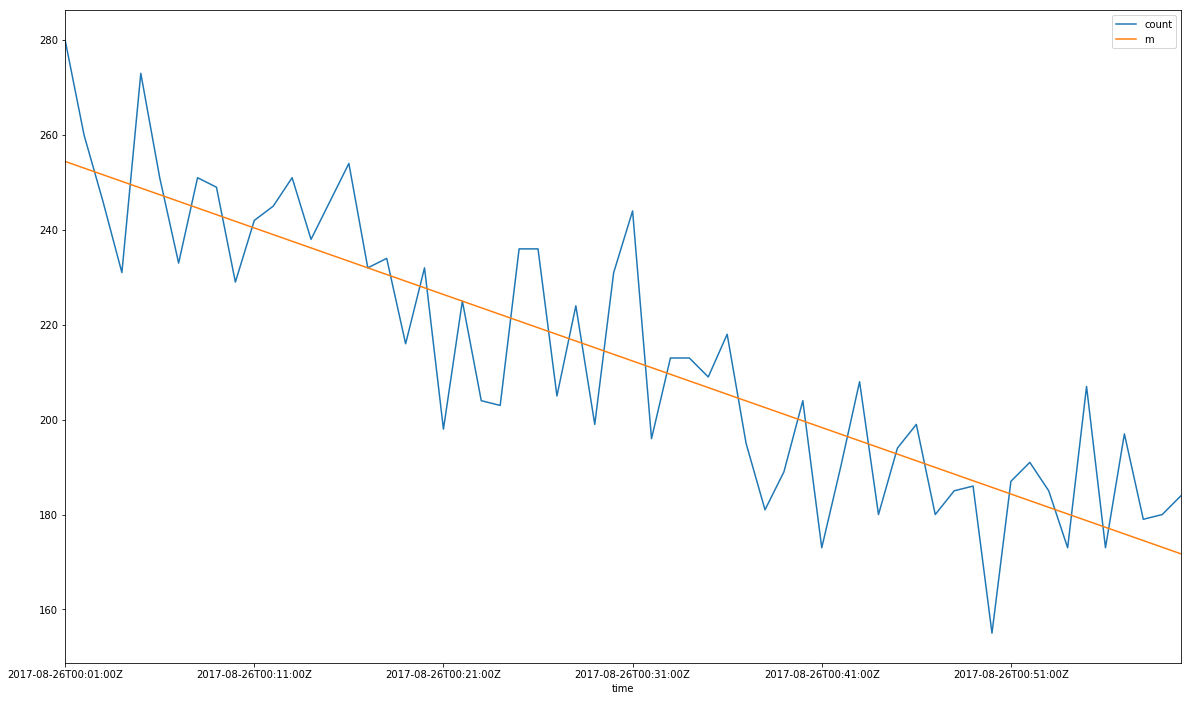

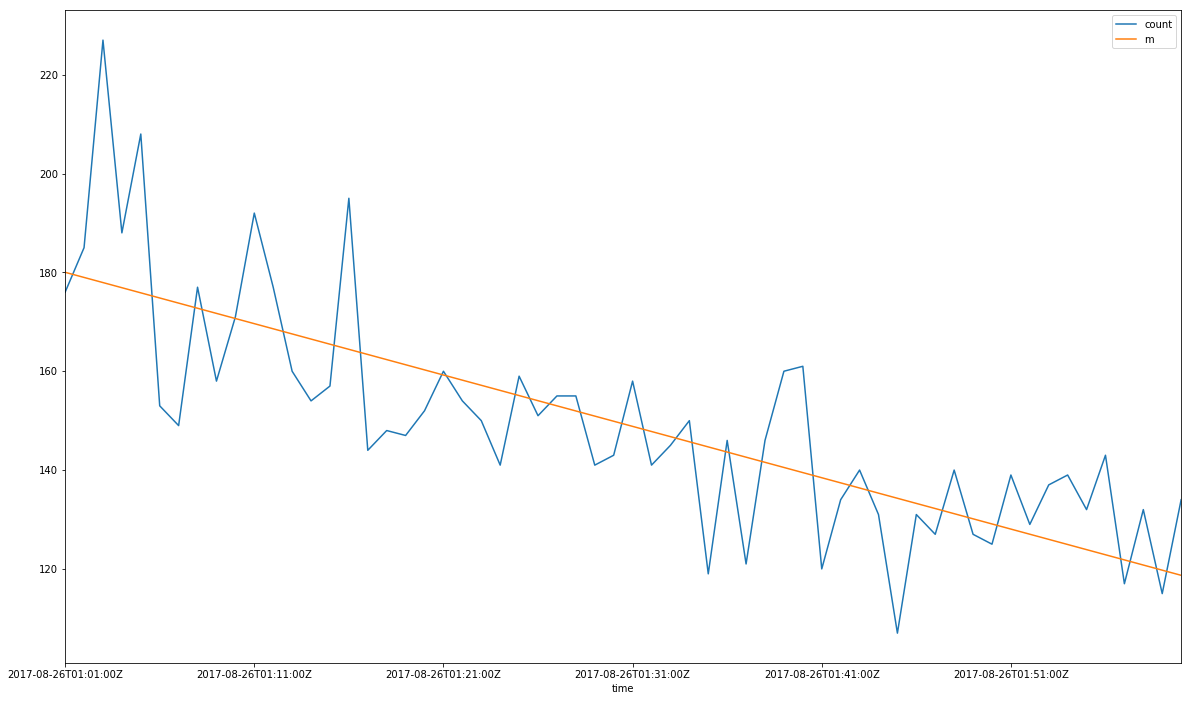

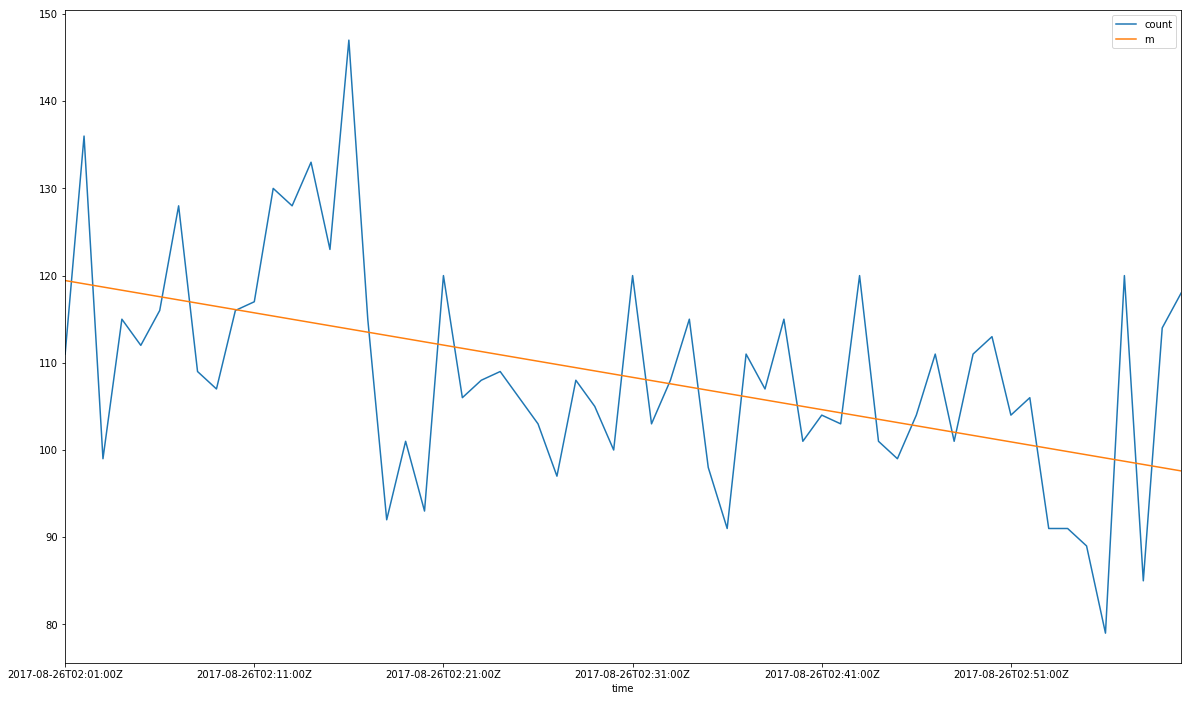

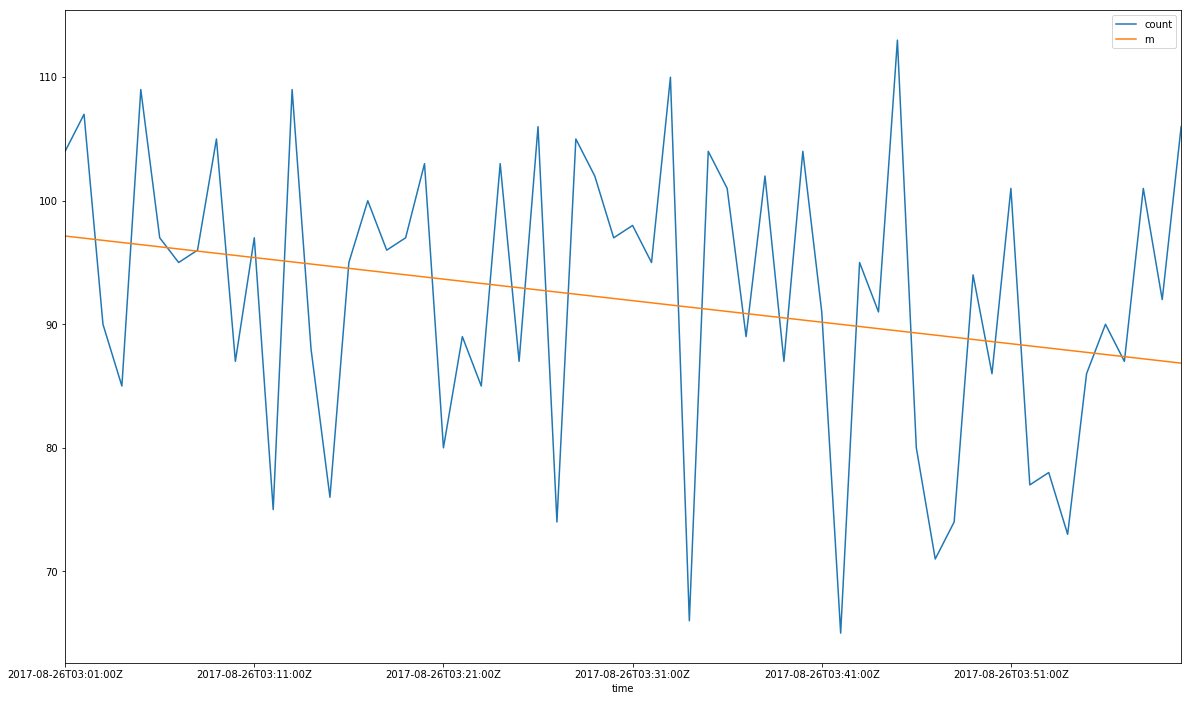

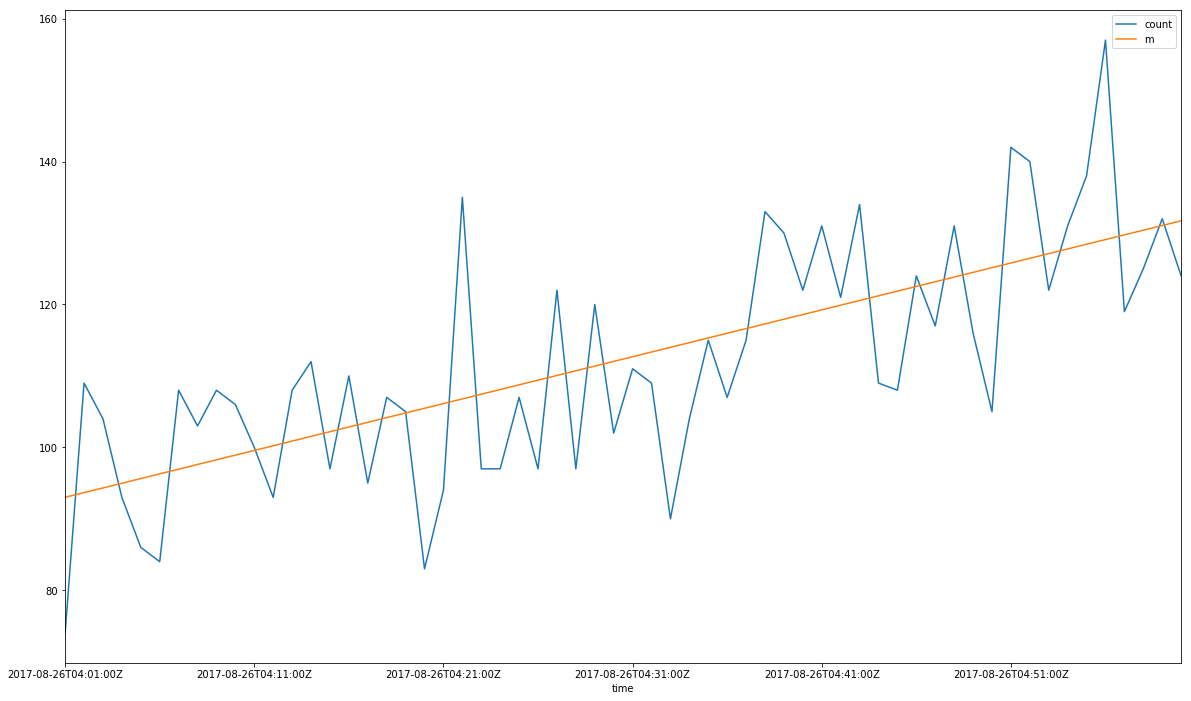

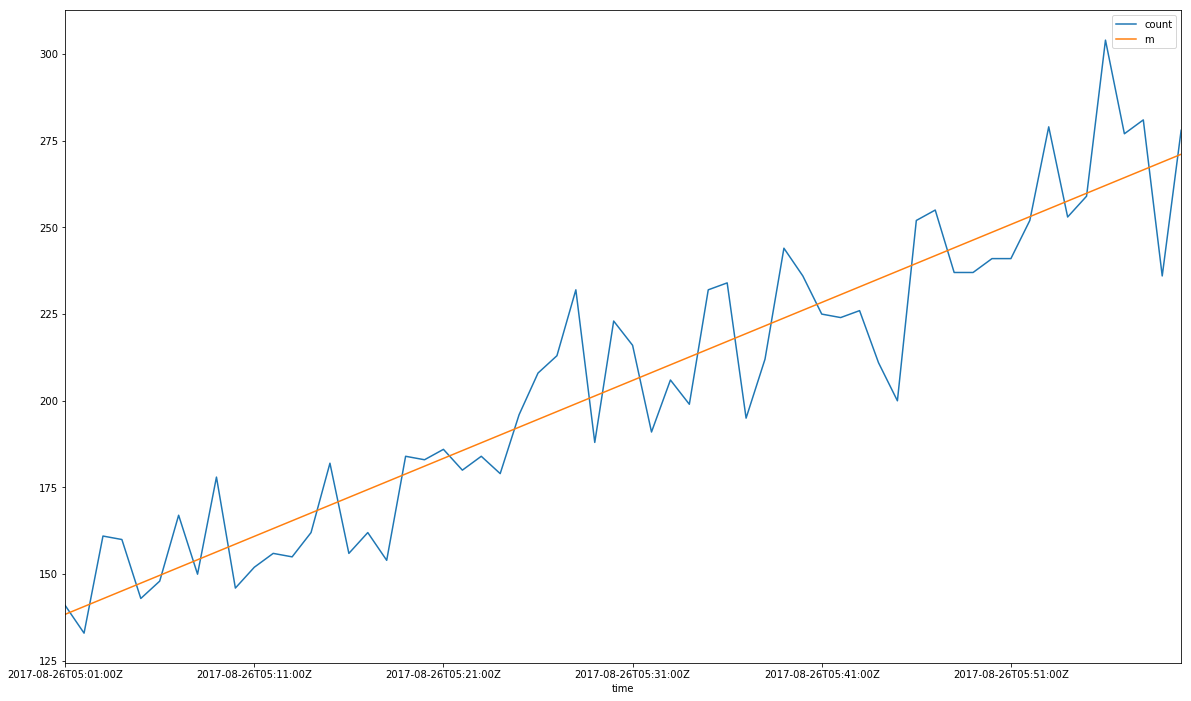

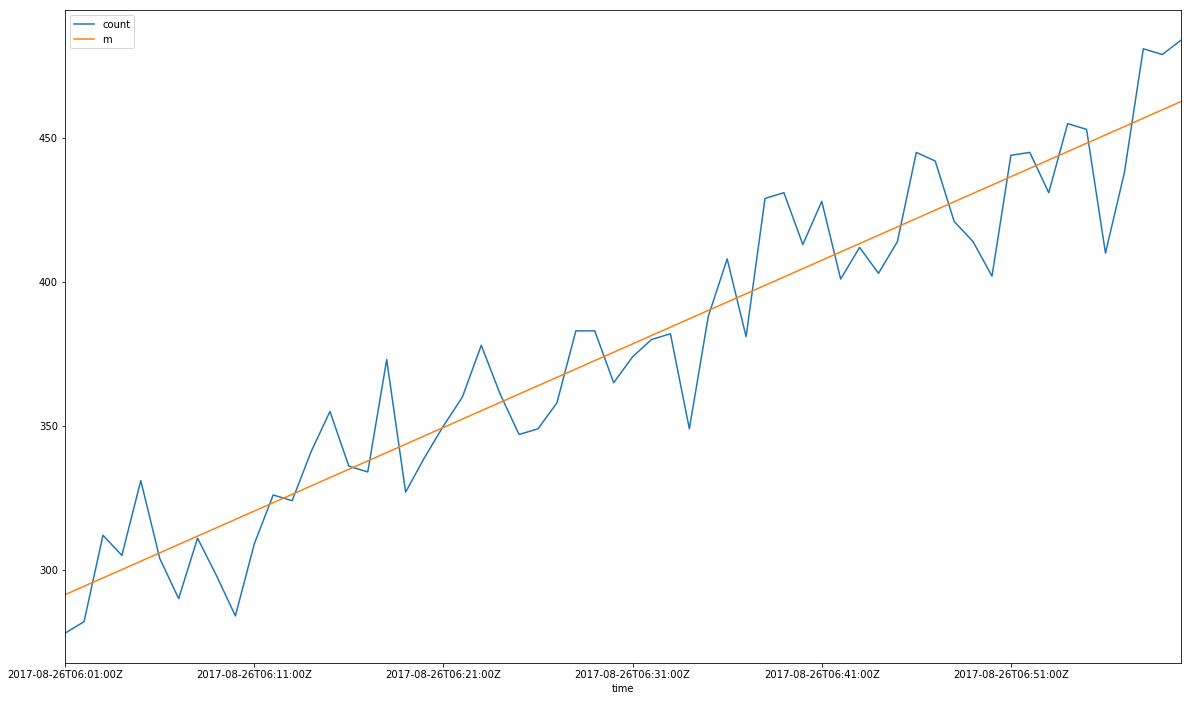

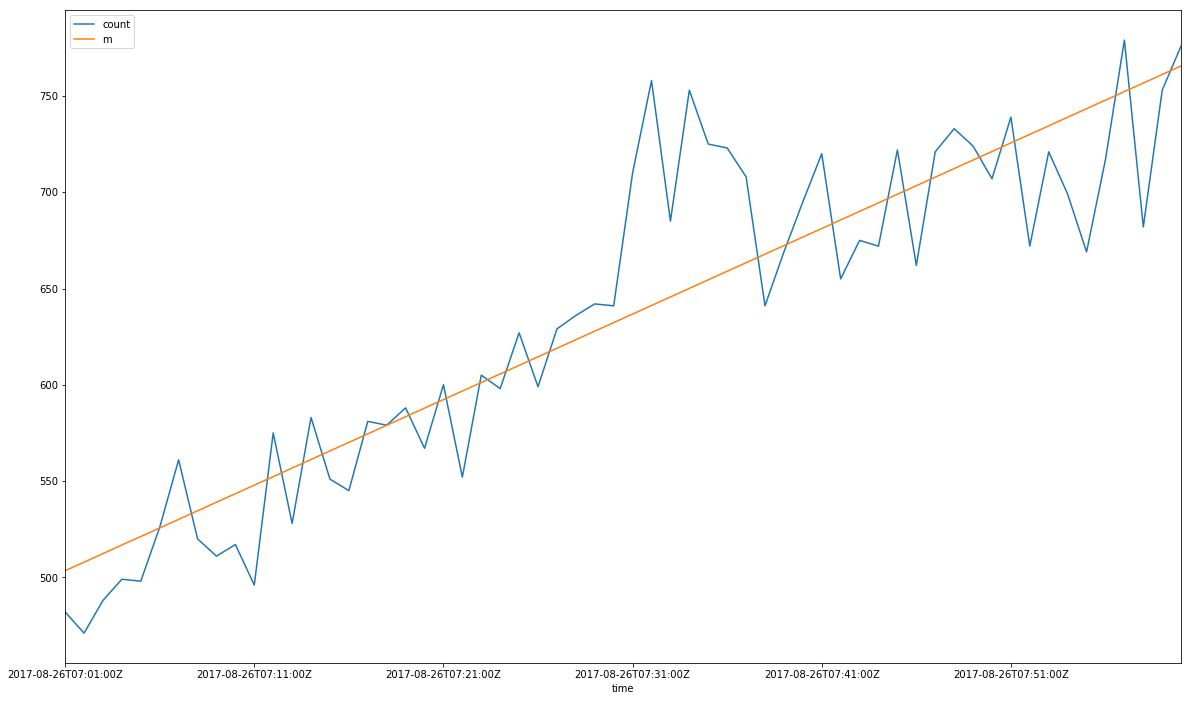

In [33]:
for key, slize in hours_slice.items():
    slize = slize.drop('x', 1)
    slize.plot()
    

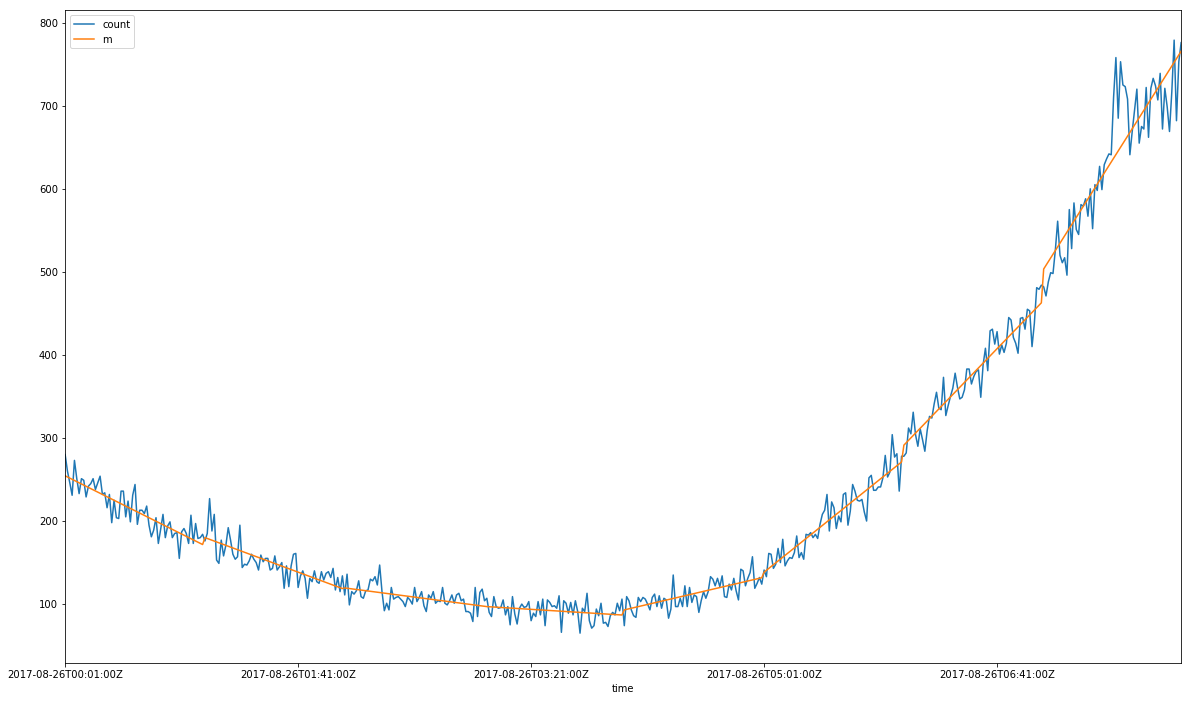

In [34]:
df_list = []
for key, slize in hours_slice.items():
    slize = slize.drop('x', 1)
    df_list.append(slize)

df_con = pd.concat(df_list)
df_con.plot()

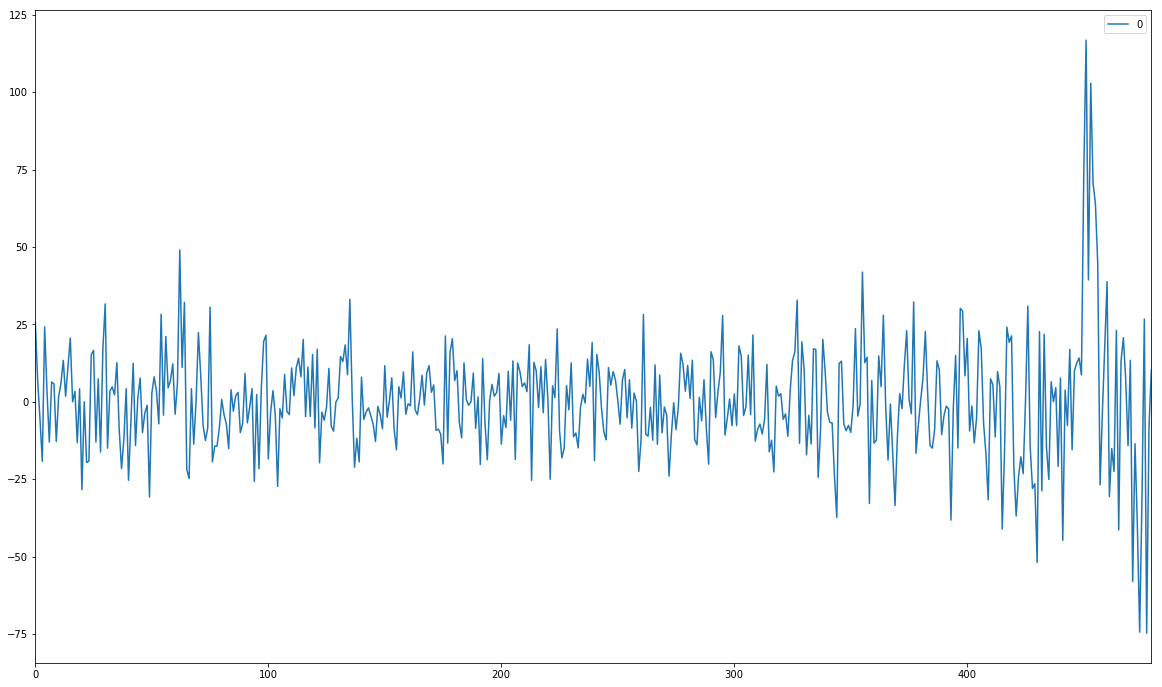

In [35]:
rows_list = []
for index, row in df_con.iterrows():
    rows_list.append(row['count'] - row['m'])
df_overal = pd.DataFrame(rows_list)
df_overal.plot()

Dickey–Fuller test: p=0.000000


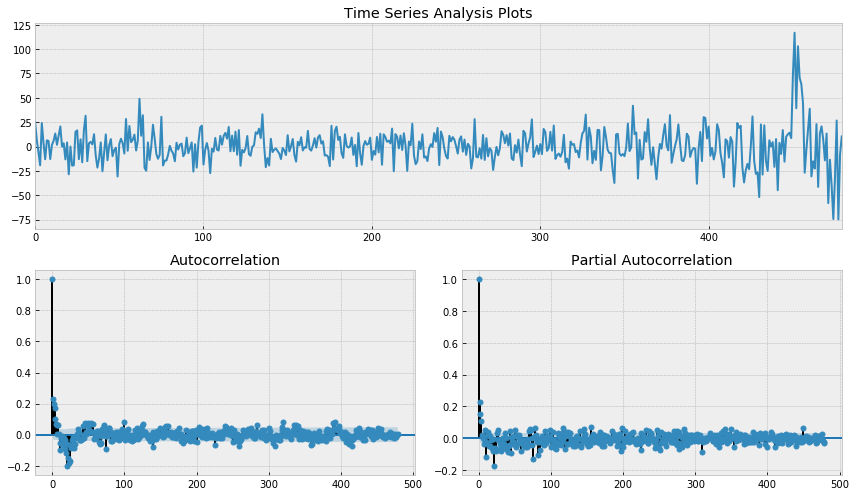

In [36]:
tsplot(df_overal.T.squeeze())

In [37]:
for key, slize in hours_slice.items():
    print(slize)
    break

                       x  count           m
time                                       
2017-08-26T00:01:00Z   1    280  254.430127
2017-08-26T00:02:00Z   2    260  253.028054
2017-08-26T00:03:00Z   3    246  251.625980
2017-08-26T00:04:00Z   4    231  250.223907
2017-08-26T00:05:00Z   5    273  248.821834
2017-08-26T00:06:00Z   6    251  247.419761
2017-08-26T00:07:00Z   7    233  246.017687
2017-08-26T00:08:00Z   8    251  244.615614
2017-08-26T00:09:00Z   9    249  243.213541
2017-08-26T00:10:00Z  10    229  241.811468
2017-08-26T00:11:00Z  11    242  240.409394
2017-08-26T00:12:00Z  12    245  239.007321
2017-08-26T00:13:00Z  13    251  237.605248
2017-08-26T00:14:00Z  14    238  236.203175
2017-08-26T00:15:00Z  15    246  234.801101
2017-08-26T00:16:00Z  16    254  233.399028
2017-08-26T00:17:00Z  17    232  231.996955
2017-08-26T00:18:00Z  18    234  230.594881
2017-08-26T00:19:00Z  19    216  229.192808
2017-08-26T00:20:00Z  20    232  227.790735
2017-08-26T00:21:00Z  21    198 

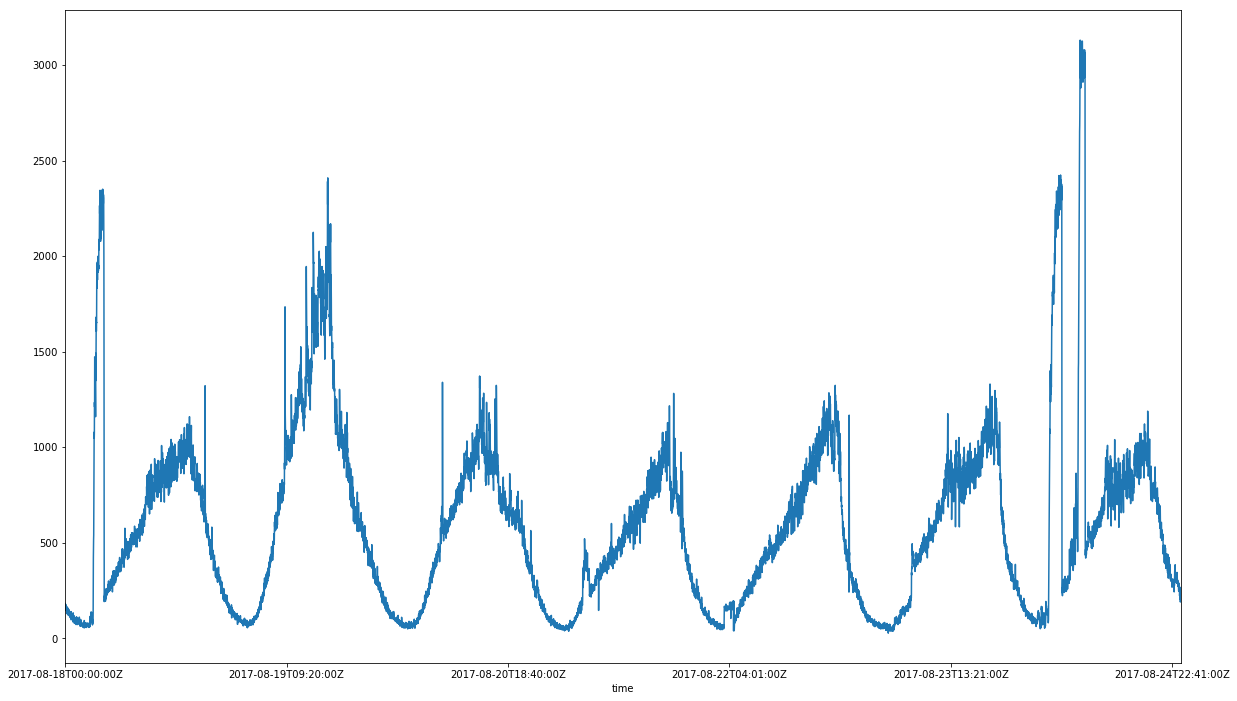

In [38]:
model.plot()

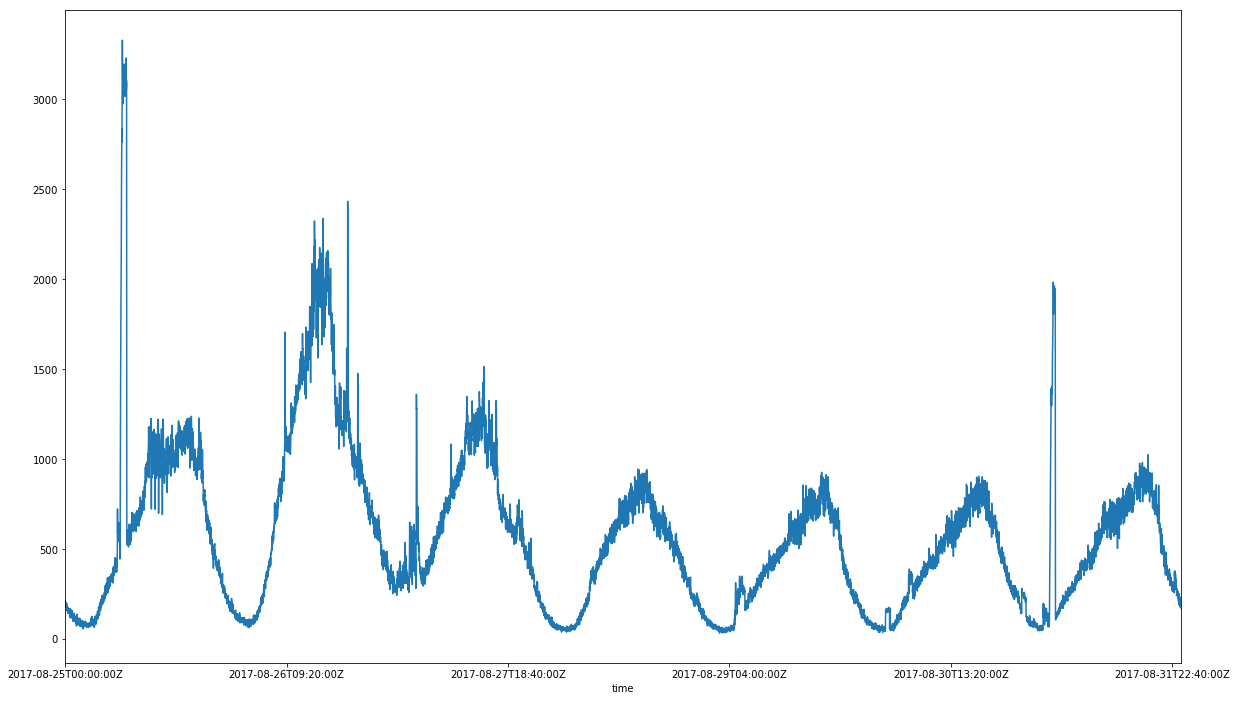

In [39]:
test.plot()

In [40]:
df_model=model.to_frame()

In [41]:
def plotMovingAverage(series, n):

    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).mean()

    # При желании, можно строить и доверительные интервалы для сглаженных значений
    rolling_std =  series.rolling(window=n).std()
    upper_bond = rolling_mean+1.96*rolling_std
    lower_bond = rolling_mean-1.96*rolling_std
    
    #rolling_mean.plot()
    
    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean)

    plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    plt.plot(lower_bond, "r--")
    plt.plot(df_model[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)



In [42]:
df_model.index = pd.to_datetime(df_model.index)


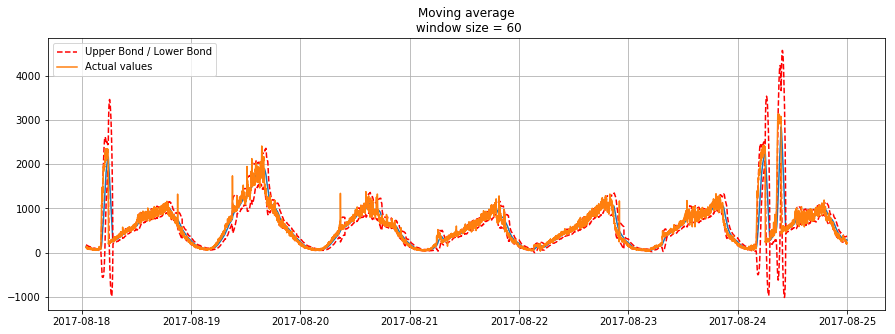

In [43]:

plotMovingAverage(df_model, 60) # 60 minutes


In [44]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # прогнозируем
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

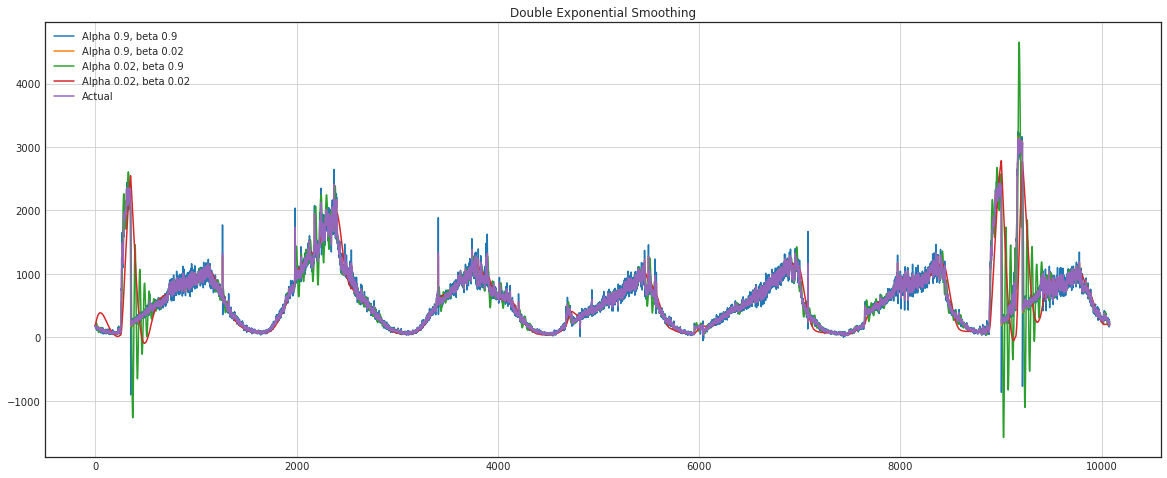

In [45]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.9, 0.02]:
        for beta in [0.9, 0.02]:
            plt.plot(double_exponential_smoothing(model, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(model.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

model.describe()

In [46]:
ma_df.describe()
ma_df.hist()

NameError: name 'ma_df' is not defined

In [47]:
MOVING_AVERAGE_WINDOW_SIZE = 60
model_1w = time_serie_login['2017-08-18T00:00:00Z':'2017-08-25T00:'+ str(MOVING_AVERAGE_WINDOW_SIZE) + ':00Z']
model_2w = time_serie_login['2017-08-11T00:00:00Z':'2017-08-18T00:' + str(MOVING_AVERAGE_WINDOW_SIZE) + ':00Z']
test = time_serie_login['2017-08-25T00:00:00Z':'2017-09-01T00:00:00Z']
MOVING_AVERAGE_WINDOW_SIZE = 60
model_1s=model_1w.rolling(MOVING_AVERAGE_WINDOW_SIZE).mean()
model_2s=model_2w.rolling(MOVING_AVERAGE_WINDOW_SIZE).mean()
#test_s=test.rolling(MOVING_AVERAGE_WINDOW_SIZE).mean()
test_s=test


In [48]:
df_model1 = model_1s.to_frame()
df_model2 = model_2s.to_frame()
df_test = test_s.to_frame()

df_model1.index = pd.to_datetime(df_model1.index)
df_model2.index = pd.to_datetime(df_model2.index)

df_test.index = pd.to_datetime(df_test.index)
df_model1 = df_model1.dropna()
df_model2 = df_model2.dropna()
df_test = df_test.dropna()

In [49]:
#df_model1.reset_index(inplace=True)
df_model2.size
#df_model2.reset_index(inplace=True)
#df_model2.size

10063

In [50]:
#del df_model2['index']

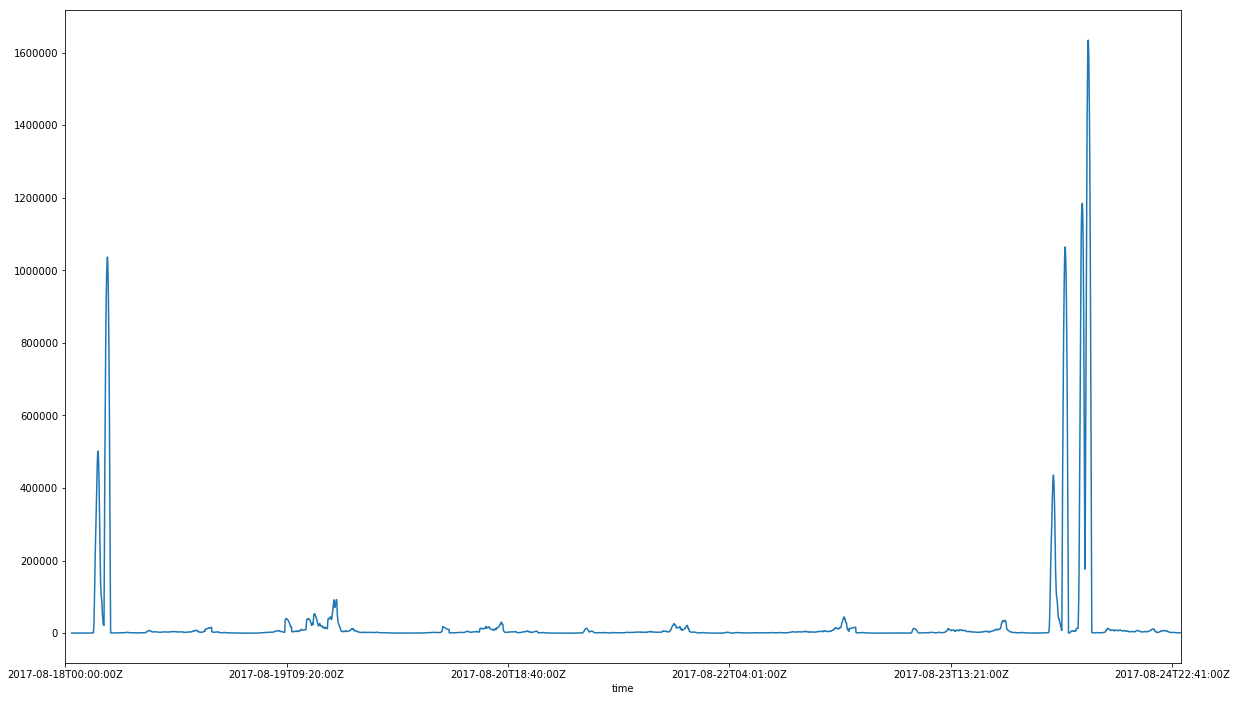

In [51]:
model_v=model.rolling(MOVING_AVERAGE_WINDOW_SIZE).var()
model_v.plot()

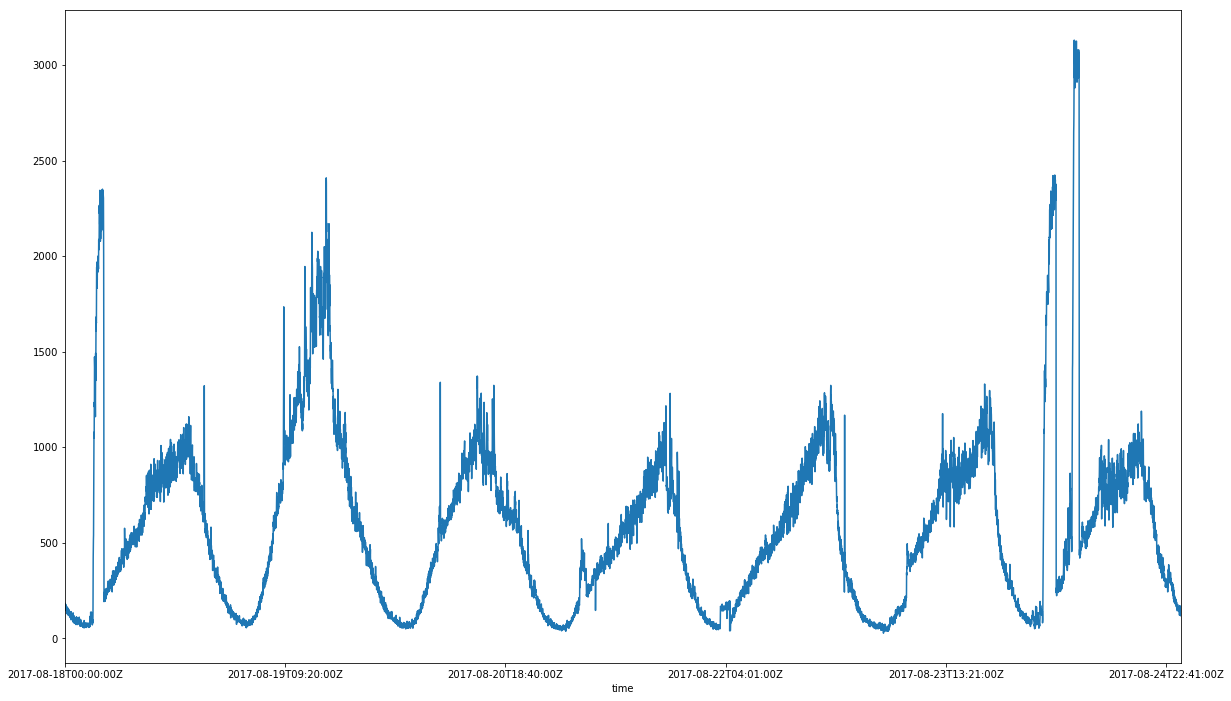

In [52]:
model_1w.plot()

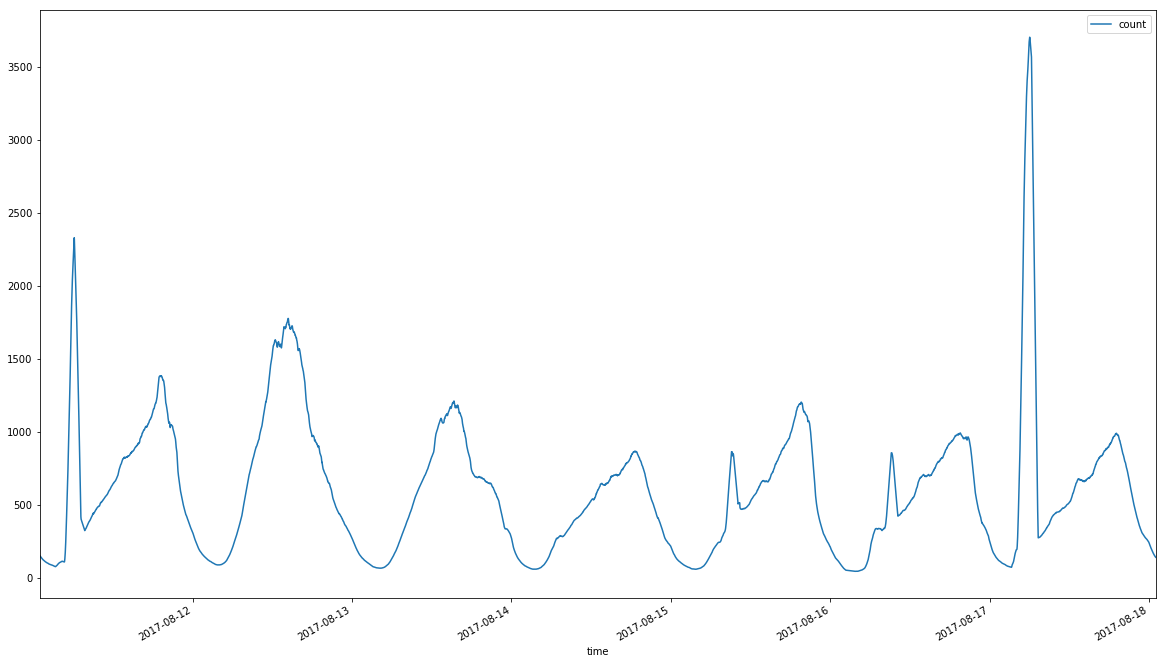

In [53]:
#df_model2.plot()

In [5]:
#df_model2

In [55]:
ts_r = time_serie_login['2017-08-11T04:40:00Z':'2017-08-11T08:00:00Z']
#ts_r.size
#time_serie_login
l = ts_r[0]
las = ts_r[ts_r.size - 1]
dy = (las-l)/ts_r.size
counter = 0
for row in ts_r.iteritems():
    #row[1] = 111 + counter * dy
    df_model2.set_value(row[0],'count', l + counter * dy)
    counter = counter + 1
    print(row[1])

111
105
132
256
417
522
572
693
759
854
949
1016
1097
1183
1339
1316
1509
1554
1500
1441
1477
1465
1451
1566
1468
1463
1472
1510
1598
1672
1774
1798
1727
1854
1916
1954
2011
2028
1953
2010
1952
2026
2059
2049
1986
1960
2002
2058
2004
1999
2011
2068
2199
2224
2290
2453
2320
2365
2377
2445
2526
2484
2568
2436
2597
2434
2455
2601
2512
2610
2585
2511
2515
2552
2594
2555
2519
2458
2544
2553
2536
2628
2570
2539
2539
2573
2578
2635
2579
2571
2559
2602
1180
455
459
451
465
487
463
459
452
466
467
479
493
467
483
470
487
476
484
446
483
498
488
476
499
455
488
499
503
538
492
472
501
518
470
307
280
304
297
279
279
335
271
301
311
300
327
306
300
272
300
293
310
346
277
291
313
328
322
332
306
323
333
317
298
310
308
323
330
342
323
293
323
339
347
322
318
331
397
361
373
371
326
352
330
363
335
326
353
345
350
350
342
340
346
375
384
397
388
393
368
400
352
367
356
390
389
395
378


In [56]:
tt = df_model2

In [57]:
df_model2 = tt
ts_r = time_serie_login['2017-08-17T02:40:00Z':'2017-08-17T08:20:00Z']
#ts_r.size
#time_serie_login
l = ts_r[0]
las = ts_r[ts_r.size - 1]
dy = (las-l)/ts_r.size
l, las
counter = 0
for row in ts_r.iteritems():
    #row[1] = 111 + counter * dy
    df_model2.set_value(row[0],'count', l + counter * dy)
    counter = counter + 1
    print(row[1])

83
88
70
75
68
54
50
72
56
84
72
84
71
73
62
71
61
71
70
85
77
69
93
73
75
60
68
65
69
57
73
60
66
78
50
64
77
134
125
300
276
275
202
215
184
156
176
156
155
199
185
215
198
177
142
222
255
280
310
330
331
336
361
370
324
315
340
250
213
234
221
218
231
235
219
230
242
214
224
217
139
97
101
84
128
154
228
476
697
848
999
1041
1142
1356
1397
1413
1581
1677
1836
1990
2033
2121
1973
1793
1851
1800
1825
1935
1927
1949
2071
2044
2314
2447
2529
2664
2665
2745
2869
2947
2973
3004
2885
2871
2861
2829
2838
2877
2794
2865
2847
2798
2932
2842
2885
2914
2824
3208
3254
3312
3358
3725
3951
3632
3569
3722
3737
3673
3532
3553
3517
3598
3576
3589
3601
3627
3575
3647
3638
3710
3554
3532
3679
3625
3788
3791
3573
3725
3742
3666
3656
3764
3715
3736
3798
3826
3756
3798
3733
3816
3705
3722
3571
3546
3595
3572
3852
3798
3739
3734
3966
3791
3898
3717
4281
3764
3541
3642
3735
3800
3807
3840
3638
3524
3232
3021
3072
3002
2992
2985
3141
3088
2971
3078
3007
3039
3109
3047
504
265
262
263
270
243
297
275
250
249


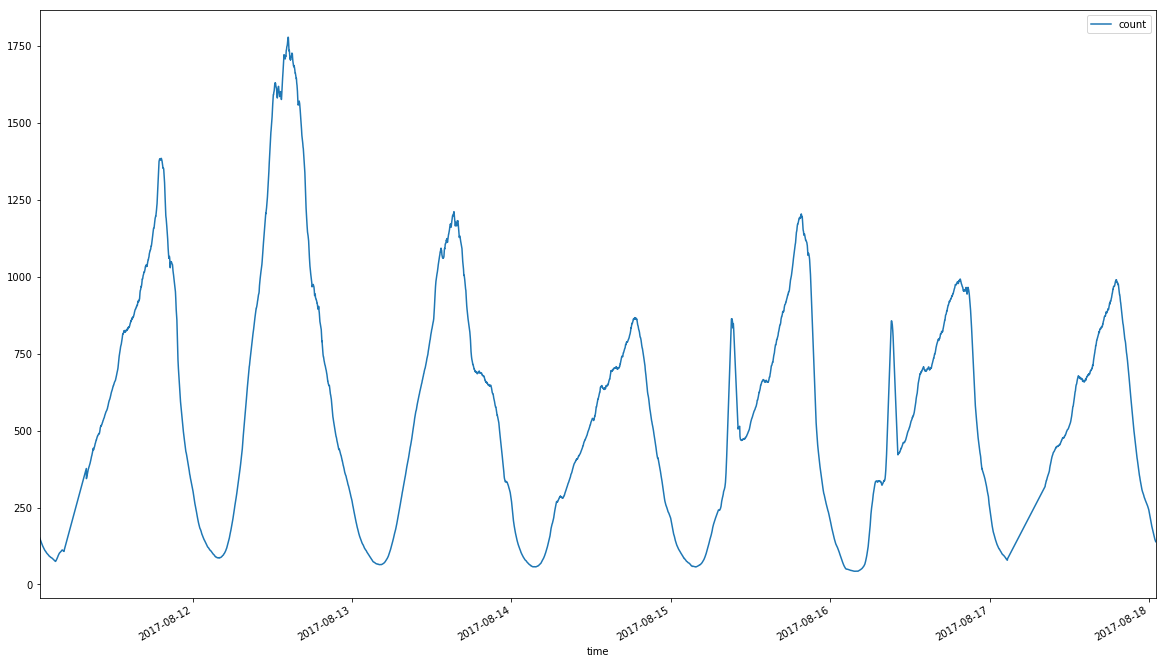

In [58]:
df_model2.plot()

In [60]:
df_model2.size

10063

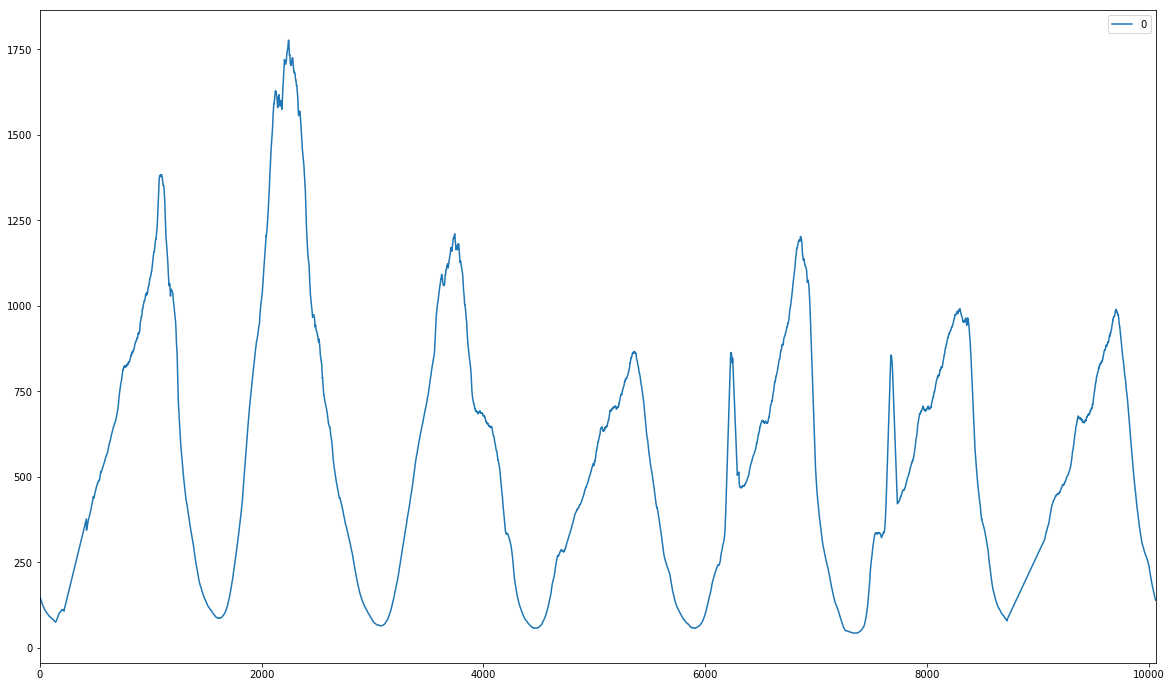

In [61]:
###averaging last and 2 week mdata
#del df_model1['time']
#del df_model2['time']
import itertools
lst = []
for k,v in itertools.zip_longest(df_model2.iterrows(), df_model2.iterrows()):
    try:
        var = (k[1][0] * 1.4 +v[1][0] * 0.6)/2
        val = var if var <=1800 else 100
        lst.append(val)
    except TypeError:
        pass
nf = pd.DataFrame(lst)
nf.plot()

In [4]:
#nf

In [63]:
for i in range(0, 17):
    nf.set_value(10063 + i, 0, 139 + i * 11/17)
    print(nf.get_value(10063 + i,0))

139.0
139.647058824
140.294117647
140.941176471
141.588235294
142.235294118
142.882352941
143.529411765
144.176470588
144.823529412
145.470588235
146.117647059
146.764705882
147.411764706
148.058823529
148.705882353
149.352941176


In [64]:
model_v1=model_1w.rolling(MOVING_AVERAGE_WINDOW_SIZE).var()
model_v2=model_2w.rolling(MOVING_AVERAGE_WINDOW_SIZE).var()

Engine.getModelInfo()


In [65]:
model_v1 = model_v1.dropna()
model_v2 = model_v2.dropna()
model_v1 = model_v1.to_frame()
model_v2 = model_v2.to_frame()
#model_v1

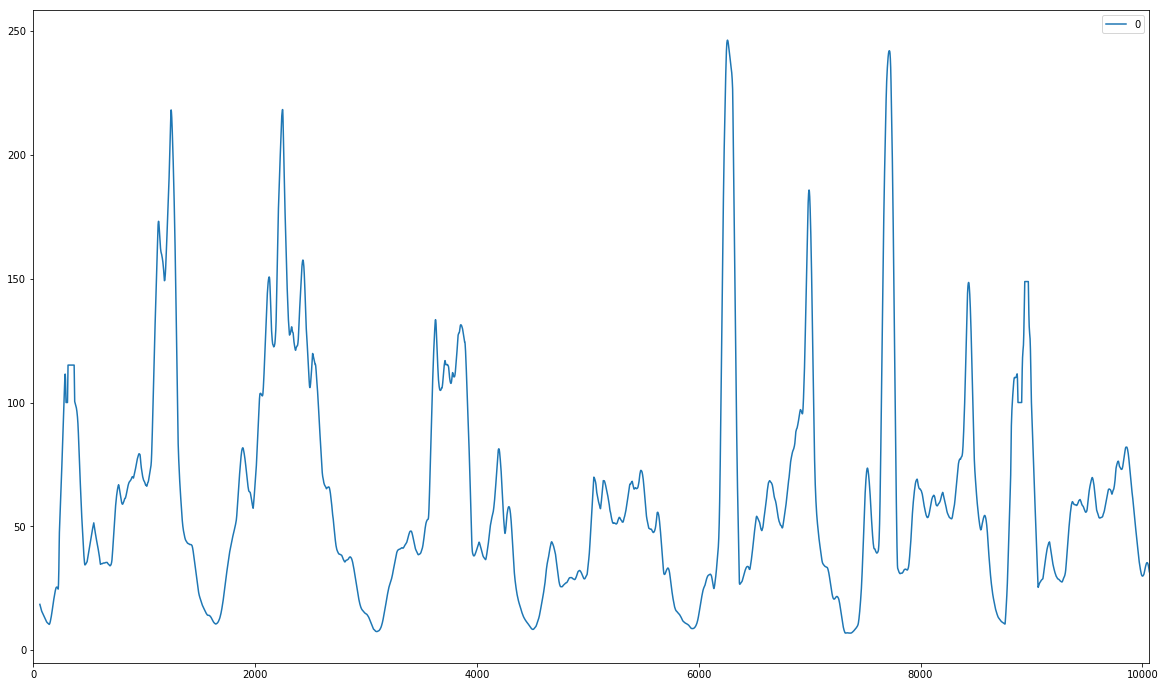

In [66]:
import math
lst = []
for k,v in itertools.zip_longest(model_v2.iterrows(), model_v2.iterrows()):
    try:
        var = math.sqrt((k[1][0] *1.4 + v[1][0] * 0.6)/2)
        val = var if var <=300 else 100
        lst.append(val)
    except TypeError:
        pass
vf = pd.DataFrame(lst)
vf = vf.rolling(MOVING_AVERAGE_WINDOW_SIZE).mean()
vf.plot()

In [67]:
vf = vf.dropna()

vf.reset_index(inplace=True)


In [68]:
del vf['index']

In [69]:
for i in range(0, 76):
    vf.set_value(10004 + i, 0, 31 - i * 12/76)
    #print(vf.get_value(10063 + i,0))

In [21]:
#vf

In [19]:
#df_test.reset_index(inplace=True)
#del df_test['time']
#df_test

In [72]:
#vf = vf.dropna()
#nf = df_model2
#vf.to_pickle('./variance.pickle')
#nf.to_pickle('./mean.pickle')

In [20]:
#nf.size

In [74]:
#Upper bound
lst = []
for row, model in itertools.zip_longest(vf.iterrows(), nf.iterrows()):
    try:
        lst.append(row[1] * 3.5 + model[1])
    except TypeError:
        pass

vf_upper = pd.DataFrame(lst)

In [75]:
#Lower bound
lst = []
for row, model in itertools.zip_longest(vf.iterrows(), nf.iterrows()):
    try:
        lst.append( model[1] - row[1] * 3.5)
    except TypeError:
        pass

vf_lower = pd.DataFrame(lst)

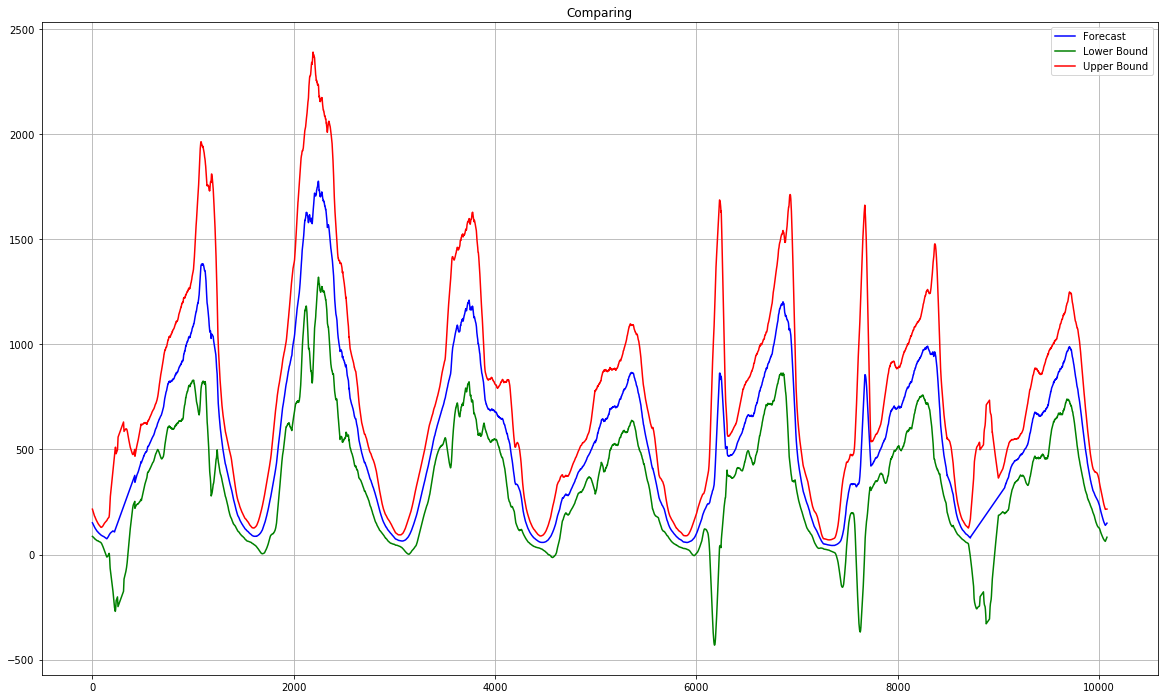

In [76]:
#plt.plot (df_test, label='Test')
plt.plot(nf, label = 'Forecast', color = 'blue')
plt.plot (vf_lower, label='Lower Bound', color = 'green')
plt.plot(vf_upper, label = 'Upper Bound', color = 'red')
plt.legend(loc="best")
plt.axis('tight')
plt.title("Comparing")
plt.grid(True)

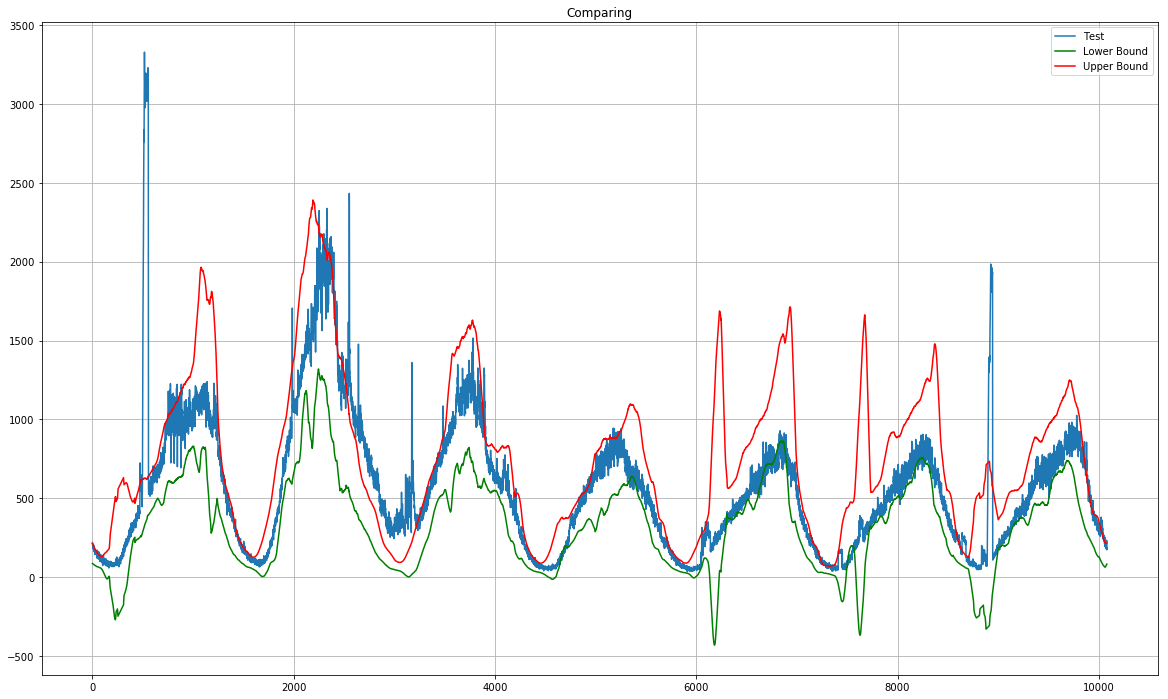

In [77]:
plt.plot (df_test, label='Test')
#plt.plot(nf, label = 'Forecast', color = 'blue')
plt.plot (vf_lower, label='Lower Bound', color = 'green')
plt.plot(vf_upper, label = 'Upper Bound', color = 'red')
plt.legend(loc="best")
plt.axis('tight')
plt.title("Comparing")
plt.grid(True)

In [78]:
vf_upper = vf_upper.dropna()

In [79]:
df_test.size

10081

In [80]:
TRESHHOLD = 100
for row, bound in itertools.zip_longest(df_test.iterrows(), vf_upper.iterrows()):
    value = row[1]['count'] - bound[1] 
    #break
    if int(value) >  TRESHHOLD:
        print('Violation event at : ', row)

Violation event at :  (473, count    724
Name: 473, dtype: int64)
Violation event at :  (498, count    864
Name: 498, dtype: int64)
Violation event at :  (499, count    1145
Name: 499, dtype: int64)
Violation event at :  (500, count    1293
Name: 500, dtype: int64)
Violation event at :  (501, count    1430
Name: 501, dtype: int64)
Violation event at :  (502, count    1635
Name: 502, dtype: int64)
Violation event at :  (503, count    1707
Name: 503, dtype: int64)
Violation event at :  (504, count    1846
Name: 504, dtype: int64)
Violation event at :  (505, count    1937
Name: 505, dtype: int64)
Violation event at :  (506, count    2075
Name: 506, dtype: int64)
Violation event at :  (507, count    2153
Name: 507, dtype: int64)
Violation event at :  (508, count    2439
Name: 508, dtype: int64)
Violation event at :  (509, count    2506
Name: 509, dtype: int64)
Violation event at :  (510, count    2630
Name: 510, dtype: int64)
Violation event at :  (511, count    2782
Name: 511, dtype: int6

Name: 2564, dtype: int64)
Violation event at :  (2565, count    1115
Name: 2565, dtype: int64)
Violation event at :  (2566, count    1209
Name: 2566, dtype: int64)
Violation event at :  (2567, count    1144
Name: 2567, dtype: int64)
Violation event at :  (2568, count    1203
Name: 2568, dtype: int64)
Violation event at :  (2569, count    1194
Name: 2569, dtype: int64)
Violation event at :  (2570, count    1230
Name: 2570, dtype: int64)
Violation event at :  (2571, count    1187
Name: 2571, dtype: int64)
Violation event at :  (2572, count    1180
Name: 2572, dtype: int64)
Violation event at :  (2573, count    1128
Name: 2573, dtype: int64)
Violation event at :  (2574, count    1088
Name: 2574, dtype: int64)
Violation event at :  (2575, count    1119
Name: 2575, dtype: int64)
Violation event at :  (2576, count    1102
Name: 2576, dtype: int64)
Violation event at :  (2577, count    1124
Name: 2577, dtype: int64)
Violation event at :  (2578, count    1143
Name: 2578, dtype: int64)
Violatio

Violation event at :  (2702, count    816
Name: 2702, dtype: int64)
Violation event at :  (2703, count    849
Name: 2703, dtype: int64)
Violation event at :  (2704, count    807
Name: 2704, dtype: int64)
Violation event at :  (2705, count    847
Name: 2705, dtype: int64)
Violation event at :  (2706, count    884
Name: 2706, dtype: int64)
Violation event at :  (2707, count    839
Name: 2707, dtype: int64)
Violation event at :  (2708, count    760
Name: 2708, dtype: int64)
Violation event at :  (2709, count    820
Name: 2709, dtype: int64)
Violation event at :  (2710, count    805
Name: 2710, dtype: int64)
Violation event at :  (2711, count    804
Name: 2711, dtype: int64)
Violation event at :  (2712, count    796
Name: 2712, dtype: int64)
Violation event at :  (2713, count    794
Name: 2713, dtype: int64)
Violation event at :  (2714, count    793
Name: 2714, dtype: int64)
Violation event at :  (2715, count    807
Name: 2715, dtype: int64)
Violation event at :  (2716, count    816
Name: 

Violation event at :  (2948, count    328
Name: 2948, dtype: int64)
Violation event at :  (2949, count    370
Name: 2949, dtype: int64)
Violation event at :  (2950, count    334
Name: 2950, dtype: int64)
Violation event at :  (2951, count    365
Name: 2951, dtype: int64)
Violation event at :  (2952, count    355
Name: 2952, dtype: int64)
Violation event at :  (2953, count    354
Name: 2953, dtype: int64)
Violation event at :  (2954, count    314
Name: 2954, dtype: int64)
Violation event at :  (2955, count    352
Name: 2955, dtype: int64)
Violation event at :  (2956, count    366
Name: 2956, dtype: int64)
Violation event at :  (2957, count    317
Name: 2957, dtype: int64)
Violation event at :  (2958, count    314
Name: 2958, dtype: int64)
Violation event at :  (2959, count    253
Name: 2959, dtype: int64)
Violation event at :  (2960, count    332
Name: 2960, dtype: int64)
Violation event at :  (2961, count    377
Name: 2961, dtype: int64)
Violation event at :  (2962, count    323
Name: 

Violation event at :  (3484, count    1085
Name: 3484, dtype: int64)
Violation event at :  (3889, count    1107
Name: 3889, dtype: int64)
Violation event at :  (3890, count    1094
Name: 3890, dtype: int64)
Violation event at :  (3891, count    1177
Name: 3891, dtype: int64)
Violation event at :  (3892, count    1326
Name: 3892, dtype: int64)
Violation event at :  (3893, count    1319
Name: 3893, dtype: int64)
Violation event at :  (3894, count    1277
Name: 3894, dtype: int64)
Violation event at :  (3895, count    1282
Name: 3895, dtype: int64)
Violation event at :  (3896, count    1150
Name: 3896, dtype: int64)
Violation event at :  (3897, count    1073
Name: 3897, dtype: int64)
Violation event at :  (3898, count    1115
Name: 3898, dtype: int64)
Violation event at :  (3899, count    1096
Name: 3899, dtype: int64)
Violation event at :  (3900, count    1091
Name: 3900, dtype: int64)
Violation event at :  (3901, count    1009
Name: 3901, dtype: int64)
Violation event at :  (3902, count

TypeError: 'NoneType' object is not subscriptable

In [111]:
vf_upper.get_value(220, 0)

469.18083315736692

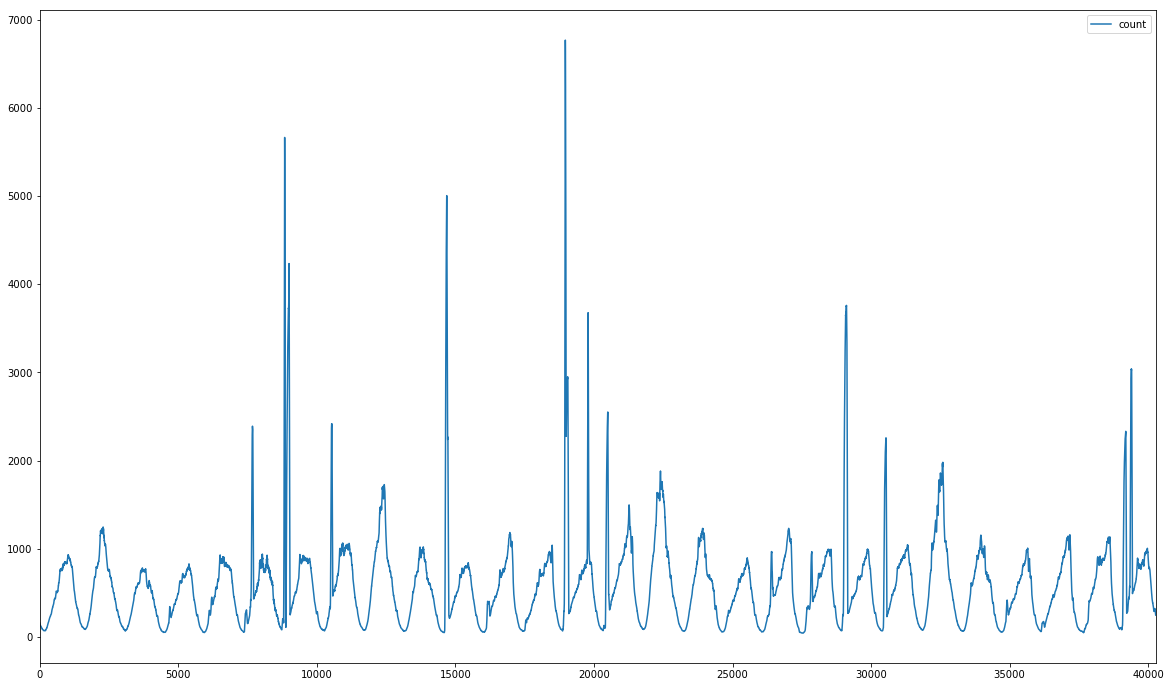

In [258]:
df_model.plot()

In [88]:
one = time_serie_login['2017-08-11T12:40:00Z':'2017-08-11T12:40:00Z']
one.index.values[0]


'2017-08-11T12:40:00Z'

In [103]:

# CONVERTS DATETIME STRING TO MINUTES OFFSET
def convert_to_tick(string_date):
    DATE_FORMAT = '%Y-%m-%dT%H:%M:%SZ'
    MINUTES_IN_ONE_DAY = 1440
    
    dt = datetime.datetime.strptime(string_date, DATE_FORMAT)
    week_day_in_minutes = (dt.weekday() + 1) * MINUTES_IN_ONE_DAY
    final_tick = week_day_in_minutes + dt.hour * 60 + dt.minute
    return final_tick
    
convert_to_tick('2017-08-14T13:41:00Z')

2261

In [100]:
class HoltWinters:

    """
    Модель Хольта-Винтерса с методом Брутлага для детектирования аномалий
    https://fedcsis.org/proceedings/2012/pliks/118.pdf

    # series - исходный временной ряд
    # slen - длина сезона
    # alpha, beta, gamma - коэффициенты модели Хольта-Винтерса
    # n_preds - горизонт предсказаний
    # scaling_factor - задаёт ширину доверительного интервала по Брутлагу (обычно принимает значения от 2 до 3)

    """

    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor

    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  

    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # вычисляем сезонные средние
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # вычисляем начальные значения
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []

        seasonals = self.initial_seasonal_components()

        for i in range(len(self.series)+self.n_preds):
            if i == 0: # инициализируем значения компонент
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])

                self.PredictedDeviation.append(0)

                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])

                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])

                continue
            if i >= len(self.series): # прогнозируем
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])

                # во время прогноза с каждым шагом увеличиваем неопределенность
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 

            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])

                # Отклонение рассчитывается в соответствии с алгоритмом Брутлага
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])

            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i % self.slen])

In [124]:
from sklearn.model_selection import TimeSeriesSplit

def timeseriesCVscore(x):
    # вектор ошибок
    errors = []

    values = data.values
    alpha, beta, gamma = x

    # задаём число фолдов для кросс-валидации
    tscv = TimeSeriesSplit(n_splits=3) 

    # идем по фолдам, на каждом обучаем модель, строим прогноз на отложенной выборке и считаем ошибку slen periods
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen = 60*24*7, alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()

        predictions = model.result[-len(test):]
        actual = values[test]
        error = mean_squared_error(predictions, actual)
        errors.append(error)

    # Возвращаем средний квадрат ошибки по вектору ошибок 
    return np.mean(np.array(errors))

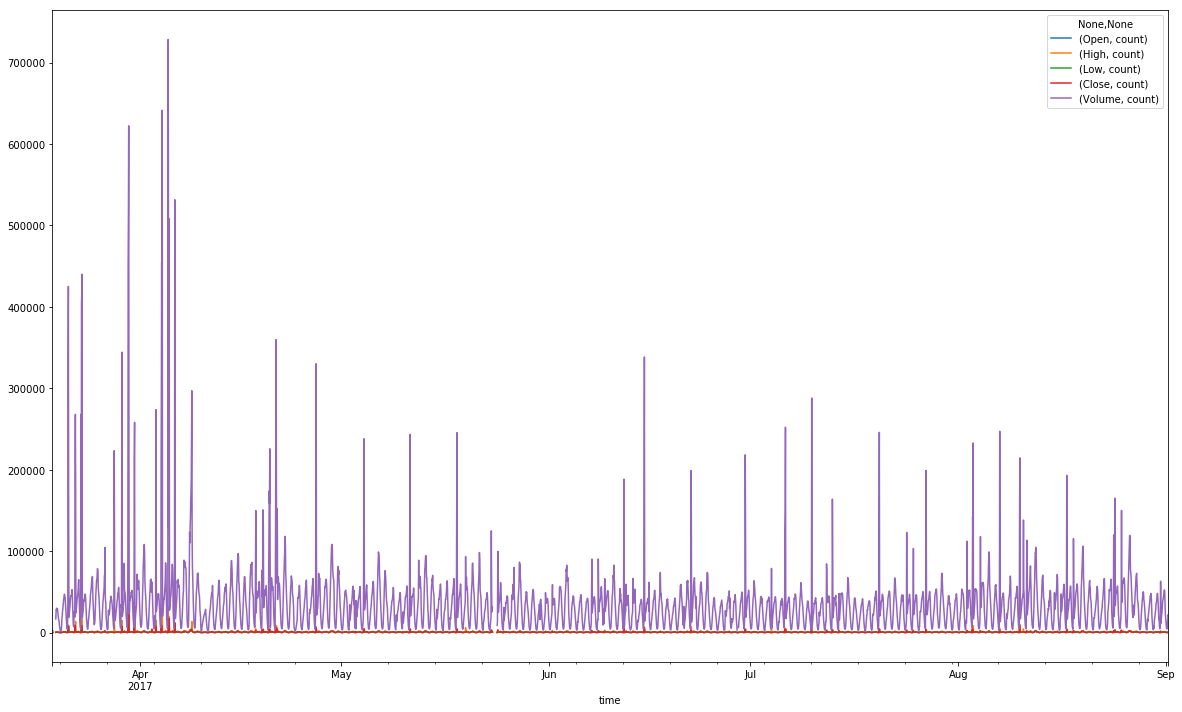

In [133]:

conversion = {'Open' : 'first', 'High' : 'max', 'Low' : 'min', 'Close' : 'last', 'Volume' : 'sum'}
tr = time_serie_login.to_frame()
tr
tr.index = pd.to_datetime(tr.index)
tr.resample('60Min', how=conversion, base=30).plot()

In [ ]:
# Send optimal parameters to model 
data = series_df
model = HoltWinters(data[:-128], slen = 24*60*7, alpha = alpha_final, beta = beta_final, gamma = gamma_final, n_preds = 24*60*7, scaling_factor = 2.56)
model.triple_exponential_smoothing()

In [ ]:
def plotHoltWinters():
    Anomalies = np.array([np.NaN]*len(data))
    Anomalies[data.values<model.LowerBond] = data.values[data.values<model.LowerBond]
    plt.figure(figsize=(25, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
    plt.plot(model.LowerBond, "r--", alpha=0.5)
    plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, y2=model.LowerBond, alpha=0.5, color = "grey")
    plt.plot(data.values, label = "Actual")
    plt.plot(Anomalies, "o", markersize=10, label = "Anomalies")
    plt.axvspan(len(data)-128, len(data), alpha=0.5, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);

plotHoltWinters()

In [ ]:
df_ts = time_serie_login.to_frame()
df_ts.index = pd.to_datetime(df_ts.index)

In [ ]:
# Resampling sample.resample('60Min', how=conversion, base=30)

*Stationery analysis*


In [ ]:
white_noise = np.random.normal(size=1000)
with plt.style.context('bmh'):  
    plt.figure(figsize=(15, 5))
    plt.plot(white_noise)
    

In [ ]:
def plotProcess(n_samples=1000, rho=0):
    x = w = np.random.normal(size=n_samples)
    for t in range(n_samples):
        x[t] = rho * x[t-1] + w[t]

    with plt.style.context('bmh'):  
        plt.figure(figsize=(10, 3))
        plt.plot(x)
        plt.title("Rho {}\n Dickey-Fuller p-value: {}".format(rho, round(sm.tsa.stattools.adfuller(x)[1], 3)))

for rho in [0, 0.6, 0.9, 1]:
    plotProcess(rho=rho)

In [138]:
#LINEAR REGRESSION MODEL
test = df_ts[-40000:]

In [12]:
aug_ts

time
2017-08-01T00:00:00Z    162
2017-08-01T00:01:00Z    135
2017-08-01T00:02:00Z    161
2017-08-01T00:03:00Z    146
2017-08-01T00:04:00Z    157
2017-08-01T00:05:00Z    152
2017-08-01T00:06:00Z    133
2017-08-01T00:07:00Z    153
2017-08-01T00:08:00Z    148
2017-08-01T00:09:00Z    152
2017-08-01T00:10:00Z    158
2017-08-01T00:11:00Z    135
2017-08-01T00:12:00Z    144
2017-08-01T00:13:00Z    151
2017-08-01T00:14:00Z    145
2017-08-01T00:15:00Z    126
2017-08-01T00:16:00Z    123
2017-08-01T00:17:00Z    120
2017-08-01T00:18:00Z    130
2017-08-01T00:19:00Z    161
2017-08-01T00:20:00Z    131
2017-08-01T00:21:00Z    109
2017-08-01T00:22:00Z    120
2017-08-01T00:23:00Z    118
2017-08-01T00:24:00Z    118
2017-08-01T00:25:00Z    142
2017-08-01T00:26:00Z    130
2017-08-01T00:27:00Z    112
2017-08-01T00:28:00Z    104
2017-08-01T00:29:00Z     96
                       ... 
2017-09-01T08:46:00Z    385
2017-09-01T08:47:00Z    398
2017-09-01T08:48:00Z    413
2017-09-01T08:49:00Z    398
2017-09-01T08:5

In [85]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

def calculate_test_statistic(ts):
    """Calculate the test statistic defined by being
       the top zscore in the timeseries.
    Args:
        ts (list or np.array): The timeseries to compute the test statistic.
    Returns:
        tuple(int, float): The index of the top zscore and the value of the top zscore.
    """
    zscores = abs(stats.zscore(ts, ddof=1))
    max_idx = np.argmax(zscores)
    return max_idx, zscores[max_idx]

def calculate_critical_value(ts, alpha):
    """Calculate the critical value with the formula given for example in
    https://en.wikipedia.org/wiki/Grubbs%27_test_for_outliers#Definition
    Args:
        ts (list or np.array): The timeseries to compute the critical value.
        alpha (float): The significance level.
    Returns:
        float: The critical value for this test.
    """
    size   = len(ts)
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    
    numerator   = (size - 1) * t_dist
    denominator = np.sqrt(size ** 2 - size * 2 + size * t_dist ** 2)

    return numerator / denominator

def seasonal_esd(ts, seasonality=None, hybrid=False, max_anomalies=10, alpha=0.05):
    """Compute the Seasonal Extreme Studentized Deviate of a time series. 
       The steps taken are first to to decompose the timeseries into STL 
       decomposition (trend, seasonality, residual). Then, calculate 
       the Median Absolute Deviate (MAD) if hybrid (otherwise the median) 
       and perform a regular ESD test on the residual, which we calculate as:
                        R = ts - seasonality - MAD or median
       
       Note: The statsmodel library requires a seasonality to compute the STL
       decomposition, hence the parameter seasonality. If none is given,
       then it will automatically be calculated to be 20% of the total
       timeseries.
    Args:
        ts (list or np.array): The timeseries to compute the ESD.
        seasonality (int): Number of time points for a season.
        hybrid (bool): See Twitter's research paper for difference.
        max_anomalies (int): The number of times the Grubbs' Test will be applied to the ts.
        alpha (float): The significance level.
    Returns:
        list int: The indices of the anomalies in the timeseries.
    """
    ts = np.array(ts)
    seasonal = seasonality or int(0.142 * len(ts)) # Seasonality is 20% of the ts if not given.
    decomp   = sm.tsa.seasonal_decompose(ts, freq=seasonal)
    if hybrid:
        mad      = np.median(np.abs(ts - np.median(ts)))
        residual = ts - decomp.seasonal - mad
    else:
        residual = ts - decomp.seasonal - np.median(ts)
    outliers = esd(residual, max_anomalies=max_anomalies, alpha=alpha)
    return outliers

def esd(timeseries, max_anomalies=10, alpha=0.05):
    """Compute the Extreme Studentized Deviate of a time series. 
       A Grubbs Test is performed max_anomalies times with the caveat 
       that each time the top value is removed. For more details visit
       http://www.itl.nist.gov/div898/handbook/eda/section3/eda35h3.htm
    Args:
        timeseries (list or np.array): The timeseries to compute the ESD.
        max_anomalies (int): The number of times the Grubbs' Test will be applied to the ts.
        alpha (float): The significance level.
    Returns:
        list int: The indices of the anomalies in the timeseries.
    """
    ts = np.copy(np.array(timeseries))
    test_statistics = []
    total_anomalies = -1
    for curr in range(max_anomalies):
        test_idx, test_val = calculate_test_statistic(ts)
        critical_value     = calculate_critical_value(ts, alpha)
        if test_val > critical_value:
            total_anomalies = curr
        test_statistics.append(test_idx)
        ts = np.delete(ts, test_idx)
    anomalous_indices = test_statistics[:total_anomalies + 1]
    return anomalous_indices



https://arxiv.org/pdf/1704.07706.pdf

In [94]:
import numpy as np

ts = np.random.random(100)
# Introduce artificial anomalies
ts[14] = 9
ts[83] = 10
outliers_indices = seasonal_esd(aug_ts, hybrid=True, max_anomalies=40)
len(outliers_indices)
#for idx in outliers_indices:
#	print ("Anomaly index: {0}, anomaly value: {1}".format(idx, aug_ts[idx]))

40

/Users/aleksandr/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/aleksandr/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/aleksandr/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/aleksandr/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


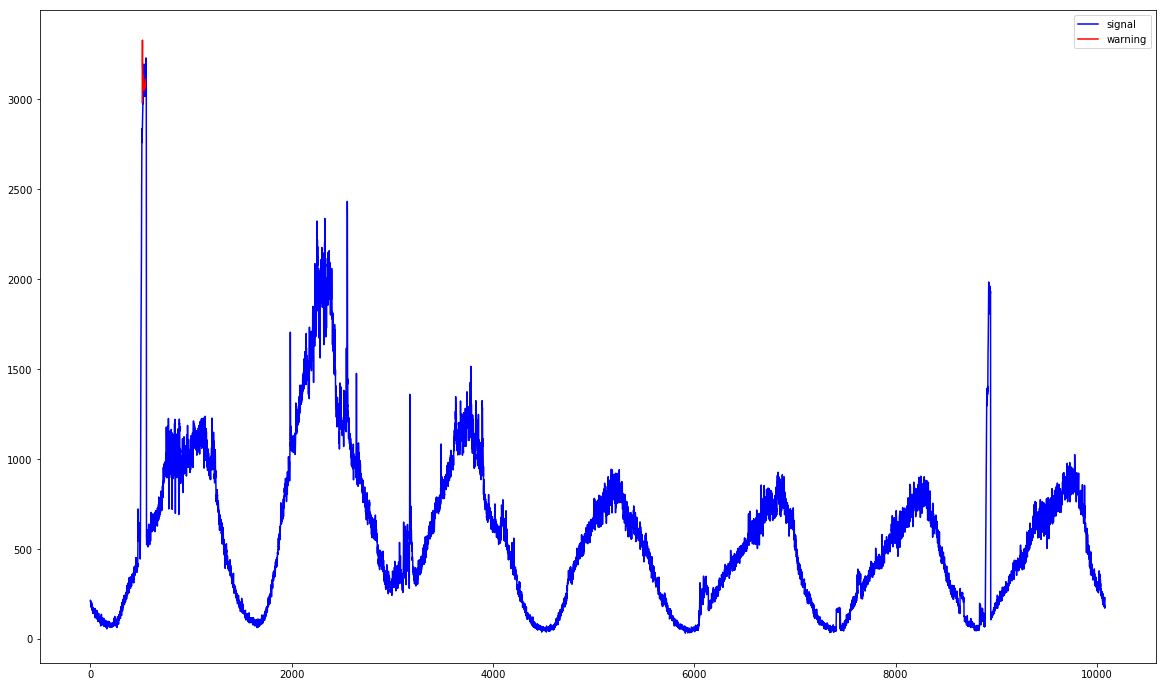

In [95]:
def mask_generator(indexes, outlier_indices):
    for x in indexes:
        if x in outliers_indices:
            yield True
        else:
            yield False
        
#outliers_indices = np.array(outliers_indices)
x2=np.arange(0,aug_ts.size,1)
data = aug_ts.convert_objects(convert_numeric=True).values
# find out which parameters are more than 1.5*std away from mean
#warning = np.array([True if x not in outliers_indices else False for x in x2])
warning = np.array([x for x in mask_generator(x2, outliers_indices)])
#warning = np.abs(S-np.mean(k)) > 1.5*np.std(S)
# enable drawing of multiple graphs on one plot
plt.hold(True)

# draw some lines behind the scatter plots (using zorder)
#plt.plot(x2, aug_ts, c='black', zorder=-1)

# scatter valid (not warning) points in blue (c='b')
plt.plot(x2[~warning], data[~warning], label='signal', c='b')

# scatter warning points in red (c='r')
plt.plot(x2[warning], data[warning], label='warning', c='r')

# draw the legend
plt.legend()

# show the figure
plt.show()

In [96]:
warning

array([False, False, False, ..., False, False, False], dtype=bool)

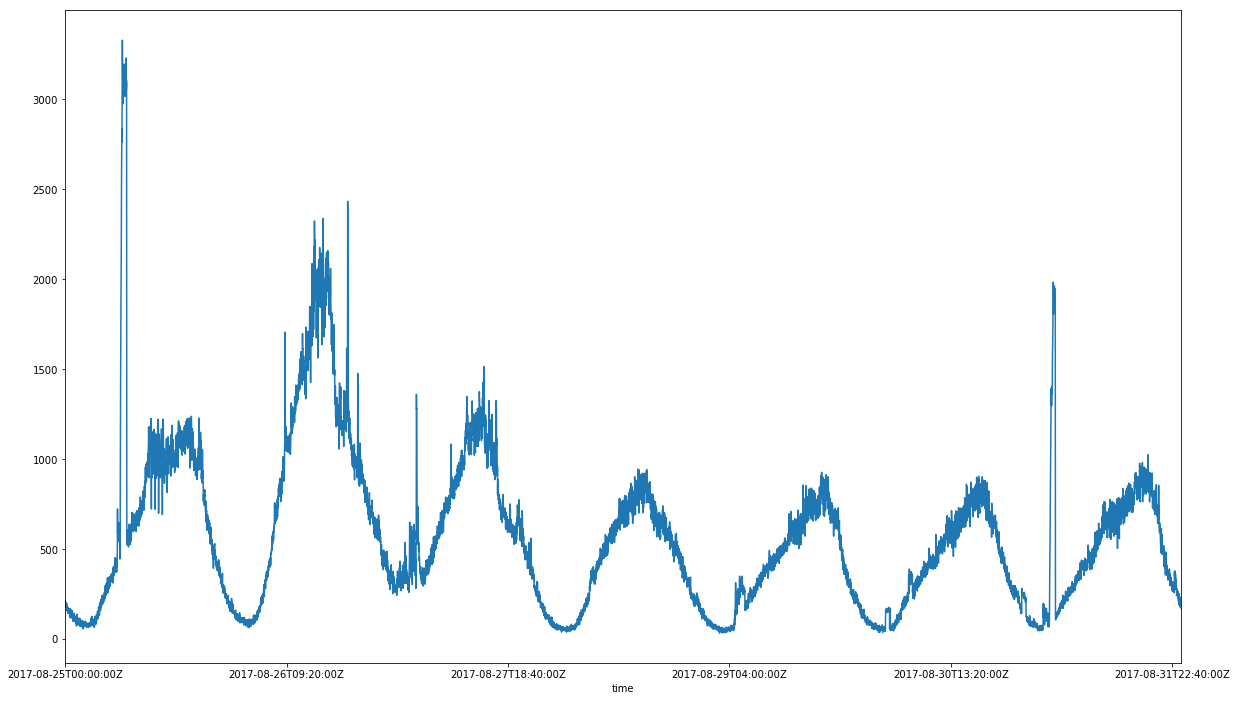

In [97]:
aug_ts.plot()

In [98]:
from seasonal import fit_seasons, adjust_seasons

In [99]:
seasons, trend = fit_seasons(aug_ts)
adjusted = adjust_seasons(aug_ts, seasons=seasons)
print(adjusted)
residual = adjusted - trend
plt.figure()
plt.plot(aug_ts, label='noisy')
plt.plot(aug_ts - residual, label='trend+season')
plt.plot(aug_ts, label='residual')
plt.legend(loc='upper left')

None


TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

In [100]:
#
# holt-winters forecasting
#
# H-W is a structural timeseries model with level, trend, and seasonal
# components that are estimated by exponential smoothing as data
# arrives (https://en.wikipedia.org/wiki/Exponential_smoothing).
# Only the additive seasonality model is implemented.
#
from sys import stderr
from copy import deepcopy
from collections import namedtuple
import numpy as np
from scipy.optimize import fmin_l_bfgs_b
import seasonal

HWState = namedtuple('HWState', 't level trend seasons')
HWParams = namedtuple('HWParams', 'alpha beta gamma')

def estimate_state(data):
    """estimate initial state for Holt Winters
    HWState estimates are for t=-1, the step before y[0].
    Parameters
    ----------
    data : ndarray
        observations
    """
    seasons, trended = seasonal.fit_seasons(data)
    if seasons is None:
        seasons = np.zeros(1)
    trend = trended[1] - trended[0]
    level = trended[0] - trend
    return HWState(-1, level, trend, seasons)

def forecast(state, steps=1):
    """return a single or multi-step forecast from the current state
    Parameters
    ----------
    state : HWState
        current model state
    steps : int
        number of steps out to forecast
    """
    season = state.seasons[(state.t + steps) % len(state.seasons)]
    return state.level + state.trend * steps + season

def advance(y, params, state):
    """incorporate the next observation into the state estimate.
    This returns updated state, using Hyndman's error correction form of H-W [1]
    It mutates state's seasonal array.
    Parameters
    ----------
    y : float
        observed value at time state.t + 1
    params : HWParams
        alpha, beta, gamma params for HW
    state : HWState
        current HW state
    Returns
    -------
    state, err : HWState, float
        state: updated state
        one-step forecast error for y
    References
    ----------
    .. [1] https://www.otexts.org/fpp/7/5, Holt-Winters additive method
    """
    seasons = state.seasons
    e = y - forecast(state)
    level = state.level + state.trend + params.alpha * e
    trend = state.trend + params.alpha * params.beta * e
    seasons[(state.t + 1) % len(state.seasons)] += params.gamma * e
    # in a proper implementation, we would enforce seasons being 0-mean.
    return HWState(state.t+1, level, trend, seasons), e

def estimate_params(data, state, alpha0=0.3, beta0=0.1, gamma0=0.1):
    """Estimate Holt Winters parameters from data
    Parameters
    ----------
    data : ndarray
        observations
    state : HWState
        initial state for HW (one step prior to first data value)
    alpha0, beta0, gamma0 : float, float, float
        initial guess for HW parameters
    Returns
    -------
    params : HWParams
    Notes
    -----
    This is a not a demo about estimating Holt Winters parameters, and
    this is not a great way to go about it, because it does not
    produce good out-of-sample error. In this demo, we unrealistically
    train the HW parameters over all the data, not just the training
    prefix used for the initial seasonal state estimate.
    """
    def _forecast_error(x0, state, data):
        """bfgs HW parameter error callback."""
        E = 0
        state = deepcopy(state)
        params = HWParams(*x0)
        for y in data:
            state, e = advance(y, params, state)
            E += e * e
        return E / len(data)

    alpha, beta, gamma = fmin_l_bfgs_b(
        _forecast_error, x0=[alpha0, beta0, gamma0], bounds=[[0, 1]] * 3,
        args=(state, data), approx_grad=True)[0]
    return HWParams(alpha, beta, gamma)

def hw(data, split=None, params=None):
    """fit a HW model and return the 1-step forecast and smoothed series.
    Parameters
    ----------
    data : array of float
        observations
    split : number
        initialize using the leading split*100% of the data (if split <=1.0)
        or N=split points (if split > 1)
    Returns
    -------
    forecast, smoothed : ndarray, ndarray
    """
    if split is None:
        splitidx = len(data)
    elif split > 1.0:
        splitidx = int(split)
    else:
        splitidx = int(split * len(data))
    state = estimate_state(data[:splitidx])
    print ("||seasons|| = {:.3f}".format(np.sqrt(np.sum(state.seasons ** 2))))
    if params is None:
        params = estimate_params(data, state)
        print ("estimated alpha={:.3f}, beta={:.3f}, gamma={:.3f}".format(*params))
    level = np.empty(len(data))
    fcast = np.empty(len(data))
    for y in data:
        yhat = forecast(state)
        state, _ = advance(y, params, state)
        level[state.t], fcast[state.t] = state.level, yhat
    print ("RMSE = ", np.sqrt(np.sum((fcast - data) ** 2) / len(data)))
    print ("final ||seasons|| = {:.3f}".format(np.sqrt(np.sum(state.seasons ** 2))))
    return fcast, level

In [101]:
aug_ts.convert_objects(convert_numeric=True).values

/Users/aleksandr/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


array([213, 217, 198, ..., 173, 189, 186])

/Users/aleksandr/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


||seasons|| = 0.000
estimated alpha=0.521, beta=0.000, gamma=0.396
RMSE =  53.8709460694
final ||seasons|| = 2515.811


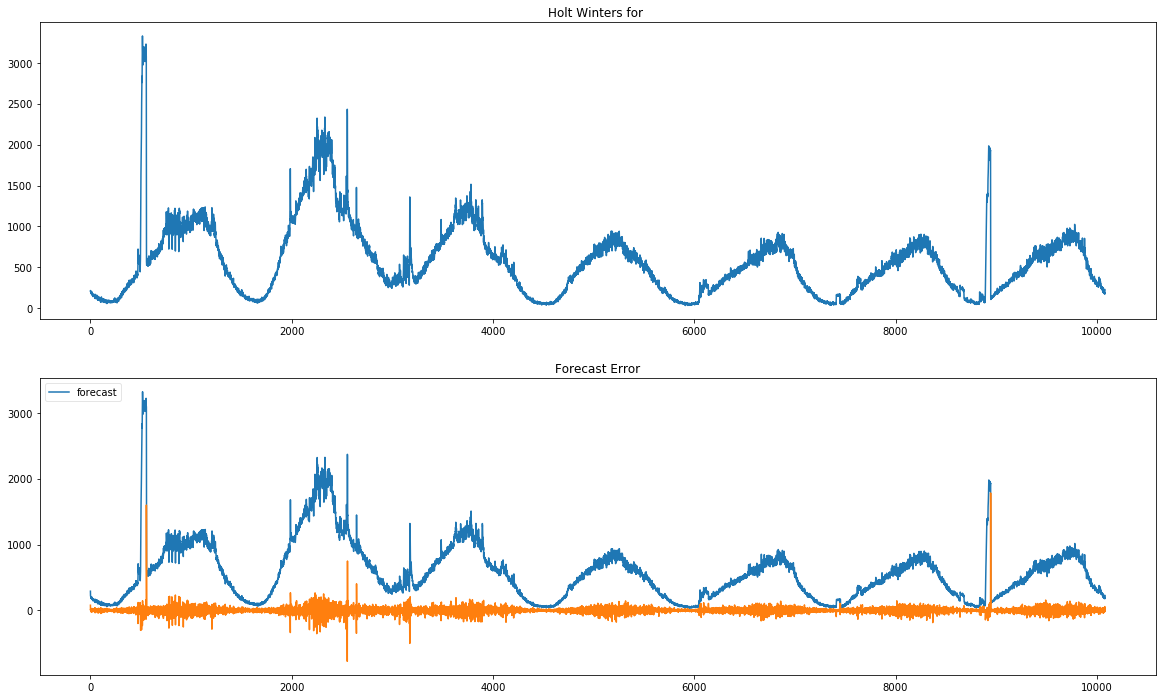

In [103]:
index = range(0,aug_ts.size)
column = 'logins'
data = aug_ts.convert_objects(convert_numeric=True).values
fcast, smoothed = hw(data)#, options.split, params=options.params
plt.figure(1)
plt.subplot(211)
plt.title("Holt Winters for ")
plt.plot(index, data, label=column)
plt.subplot(212)
plt.plot(index, fcast, label="forecast")
#plt.plot(index, smoothed, label="smoothed")
leg = plt.legend(loc='upper left')
leg.get_frame().set_alpha(0.5)
plt.subplot(212)
plt.title("Forecast Error")
plt.plot(index, fcast - data)
plt.show()


In [138]:
S = fcast - data
warning = np.abs(S-np.mean(S)) > 4*np.std(S)

In [139]:
#warning = fcast-data > 500

/Users/aleksandr/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/aleksandr/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/aleksandr/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/aleksandr/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


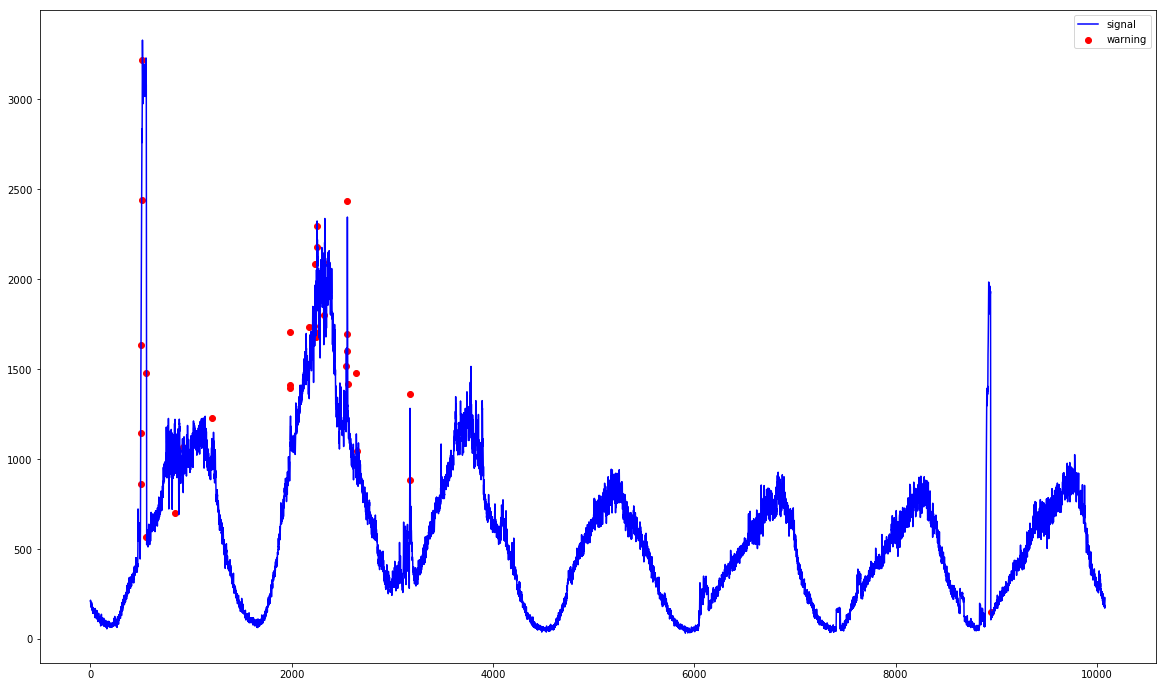

In [140]:
def mask_generator(indexes, outlier_indices):
    for x in indexes:
        if x in outliers_indices:
            yield True
        else:
            yield False
        
#outliers_indices = np.array(outliers_indices)
x2=np.arange(0,aug_ts.size,1)
data = aug_ts.convert_objects(convert_numeric=True).values
# find out which parameters are more than 1.5*std away from mean
#warning = np.array([True if x not in outliers_indices else False for x in x2])
#warning = np.array([x for x in mask_generator(x2, outliers_indices)])

# enable drawing of multiple graphs on one plot
plt.hold(True)

# draw some lines behind the scatter plots (using zorder)
#plt.plot(x2, aug_ts, c='black', zorder=-1)

# scatter valid (not warning) points in blue (c='b')
plt.plot(x2[~warning], data[~warning], label='signal', c='b')

# scatter warning points in red (c='r')
plt.scatter(x2[warning], data[warning], label='warning', c='r')

# draw the legend
plt.legend()

# show the figure
plt.show()

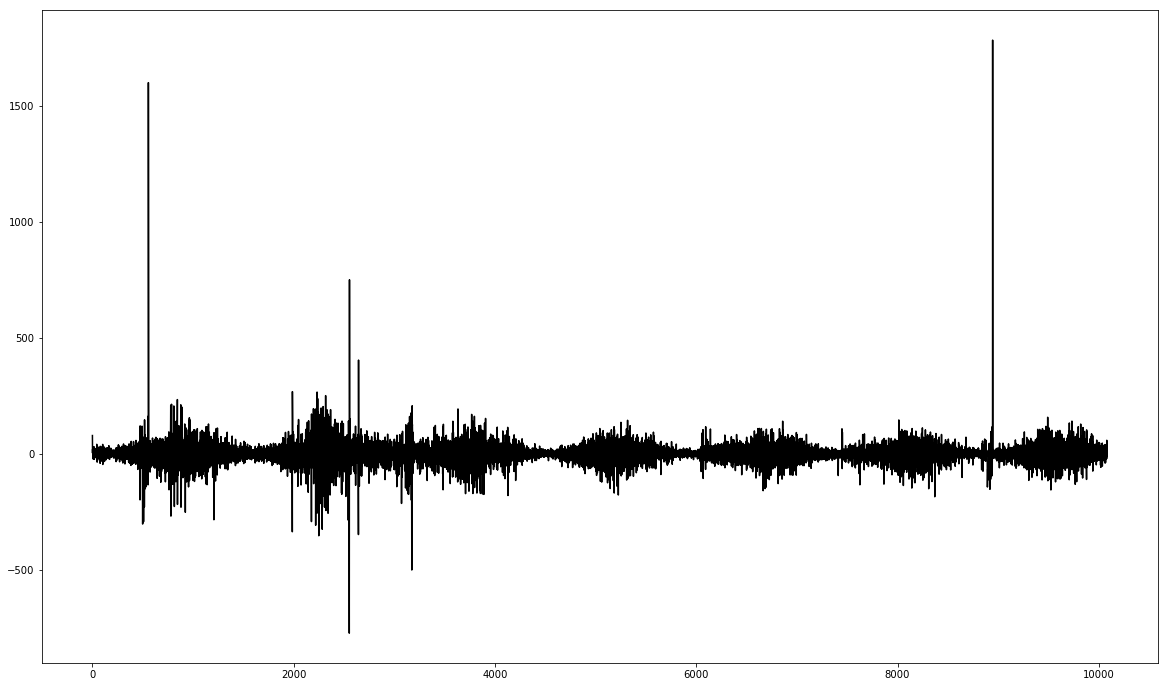

In [128]:
# draw some lines behind the scatter plots (using zorder)
plt.plot(x2, fcast - data, c='black', zorder=-1)

/Users/aleksandr/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/aleksandr/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/aleksandr/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/aleksandr/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


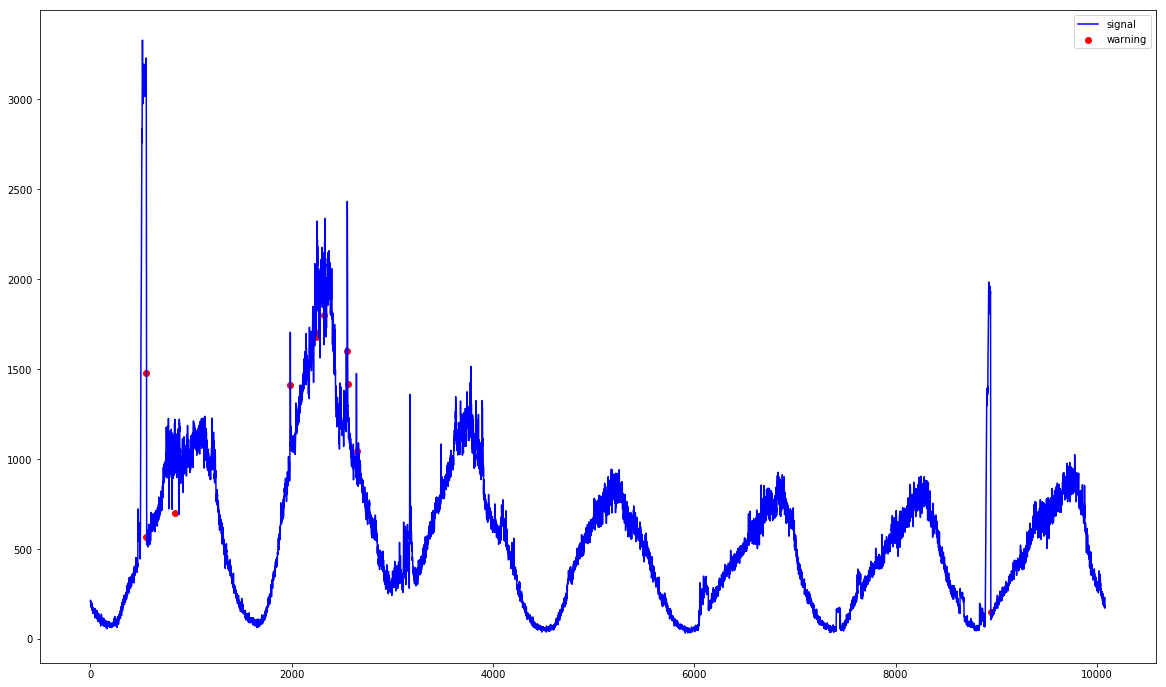

In [150]:
warning = S > (S).mean() + 4*np.std(S)
def mask_generator(indexes, outlier_indices):
    for x in indexes:
        if x in outliers_indices:
            yield True
        else:
            yield False
        
#outliers_indices = np.array(outliers_indices)
x2=np.arange(0,aug_ts.size,1)
data = aug_ts.convert_objects(convert_numeric=True).values
# find out which parameters are more than 1.5*std away from mean
#warning = np.array([True if x not in outliers_indices else False for x in x2])
#warning = np.array([x for x in mask_generator(x2, outliers_indices)])

# enable drawing of multiple graphs on one plot
plt.hold(True)

# draw some lines behind the scatter plots (using zorder)
#plt.plot(x2, aug_ts, c='black', zorder=-1)

# scatter valid (not warning) points in blue (c='b')
plt.plot(x2[~warning], data[~warning], label='signal', c='b')

# scatter warning points in red (c='r')
plt.scatter(x2[warning], data[warning], label='warning', c='r')

# draw the legend
plt.legend()

# show the figure
plt.show()

In [147]:
S.mean()

0.6307117263751586

In [148]:
S.std()

53.867253810905744